# Nashville

In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd

'/Users/minwoo/Desktop/bigdata'

In [3]:
calendar = pd.read_csv('usa/Nashville/calendar.csv')

In [7]:
listings = pd.read_csv('usa/Nashville/listings.csv')
listings_detailed = pd.read_csv('usa/Nashville/listings_detailed.csv')
neighbor = pd.read_csv('usa/Nashville/neighbourhoods.csv')
neighbor_json = pd.read_json('usa/Nashville/neighbourhoods.geojson')
review = pd.read_csv('usa/Nashville/reviews.csv')
review_detailed = pd.read_csv('usa/Nashville/reviews_detailed.csv')

In [9]:
data_list = [
    ("calendar", calendar.shape),  
    ("listings", listings.shape),
    ("listings_detailed", listings_detailed.shape),
    ("neighbor", neighbor.shape),
    ("neighbor_json", neighbor_json.shape),  # JSON structure might be more complex than what .shape can describe
    ("review", review.shape),
    ("review_detailed", review_detailed.shape)
]

for name, shape in data_list:
    print(f"The shape of '{name}' dataframe is: {shape}")

The shape of 'calendar' dataframe is: (3119707, 7)
The shape of 'listings' dataframe is: (8548, 18)
The shape of 'listings_detailed' dataframe is: (8548, 75)
The shape of 'neighbor' dataframe is: (35, 2)
The shape of 'neighbor_json' dataframe is: (35, 2)
The shape of 'review' dataframe is: (541576, 2)
The shape of 'review_detailed' dataframe is: (541576, 6)


# Calendar

In [10]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2023-03-19,f,$43.00,$43.00,30.0,365.0
1,6422,2023-03-20,f,$43.00,$43.00,30.0,365.0
2,6422,2023-03-21,f,$43.00,$43.00,30.0,365.0
3,6422,2023-03-22,f,$43.00,$43.00,30.0,365.0
4,6422,2023-03-23,f,$43.00,$43.00,30.0,365.0


In [11]:
import pandas as pd

def simple_eda(df):
    # Set display format to avoid scientific notation, adjust precision as needed
    pd.set_option('display.float_format', lambda x: '%.3f' % x)

    # Basic structure
    print("Basic Structure:")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}\n")

    # Missing values
    print("Missing Values by Column:")
    print(df.isnull().sum(), "\n")

    # Data types
    print("Data Types:")
    print(df.dtypes, "\n")

    # Unique values by column
    print("Unique Values by Column:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()}")
    print("\n")

    # Summary statistics for numerical columns
    print("Summary Statistics for Numerical Columns:")
    print(df.describe(), "\n")

    # Details on categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("Categorical Columns Details:")
        for col in categorical_cols:
            print(f"Column '{col}' unique values:")
            print(df[col].unique())
    else:
        print("No categorical columns found.")


In [12]:
simple_eda(calendar)

Basic Structure:
Number of Rows: 3119707
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    1
maximum_nights    1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 8547
date: 378
available: 2
price: 4621
adjusted_price: 4574
minimum_nights: 46
maximum_nights: 382


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            3119707.000     3119706.000     3119706.000
mean  278058000185249888.000           6.560     1242533.611
std   349045634302280320.000          17.790    51625659.883
min                 6422.000           1.000           1.000
25%             33017745.000           2.000         365.000

In [13]:
calendar['listing_id'].unique()

array([   6422,  421290,   39870, ..., 3578360, 3595967, 3615228])

## Look at same listing_id

In [14]:
id_6422 = calendar.loc[calendar['listing_id'] == 6422]
id_6422


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2023-03-19,f,$43.00,$43.00,30.000,365.000
1,6422,2023-03-20,f,$43.00,$43.00,30.000,365.000
2,6422,2023-03-21,f,$43.00,$43.00,30.000,365.000
3,6422,2023-03-22,f,$43.00,$43.00,30.000,365.000
4,6422,2023-03-23,f,$43.00,$43.00,30.000,365.000
...,...,...,...,...,...,...,...
360,6422,2024-03-13,t,$43.00,$43.00,30.000,365.000
361,6422,2024-03-14,t,$43.00,$43.00,30.000,365.000
362,6422,2024-03-15,t,$43.00,$43.00,30.000,365.000
363,6422,2024-03-16,t,$43.00,$43.00,30.000,365.000


/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/1290996257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_6422['date'] = pd.to_datetime(id_6422['date'])
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/1290996257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_6422['price'] = id_6422['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/1290996257.py:10: SettingWithCopyWarning: 
A value is tryi

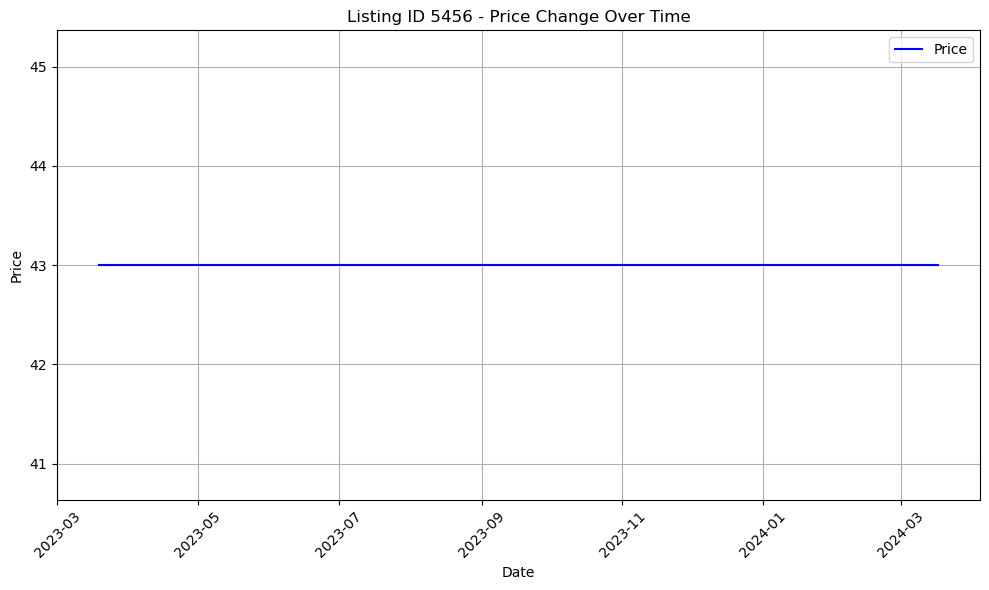

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame named df
# Convert 'date' column to datetime format
id_6422['date'] = pd.to_datetime(id_6422['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
id_6422['price'] = id_6422['price'].replace('[\$,]', '', regex=True).astype(float)
id_6422['adjusted_price'] = id_6422['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Sort DataFrame by 'date'
id_6422 = id_6422.sort_values(by='date')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(id_6422['date'], id_6422['price'], linestyle='-', label='Price',  color='blue')
plt.title('Listing ID 5456 - Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


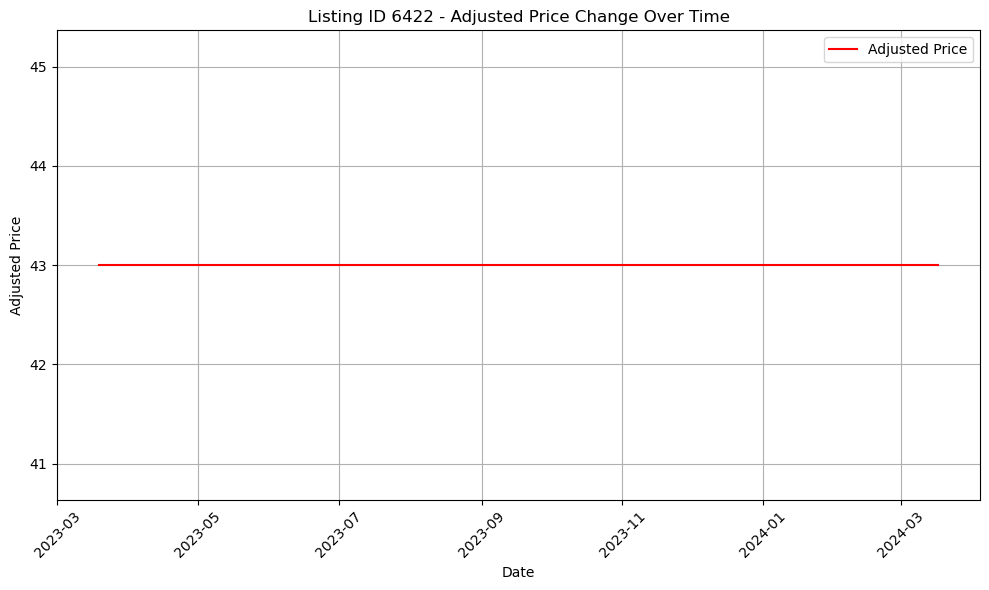

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame named df
# Convert 'date' column to datetime format
id_6422['date'] = pd.to_datetime(id_6422['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
id_6422['adjusted_price'] = id_6422['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Sort DataFrame by 'date'
id_6422 = id_6422.sort_values(by='date')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(id_6422['date'], id_6422['adjusted_price'], linestyle='-', label='Adjusted Price',  color='red')
plt.title('Listing ID 6422 - Adjusted Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


### Any difference in Price VS Adjusted_Price?

In [19]:
# Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
id_6422['price'] = id_6422['price'].replace('[\$,]', '', regex=True).astype(float)
id_6422['adjusted_price'] = id_6422['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
id_6422['price_difference'] = id_6422['price'] - id_6422['adjusted_price']

# Display rows where there is a difference
print(len(id_6422[id_6422['price_difference'] != 0]))

0


### Does Availability Change the Price?


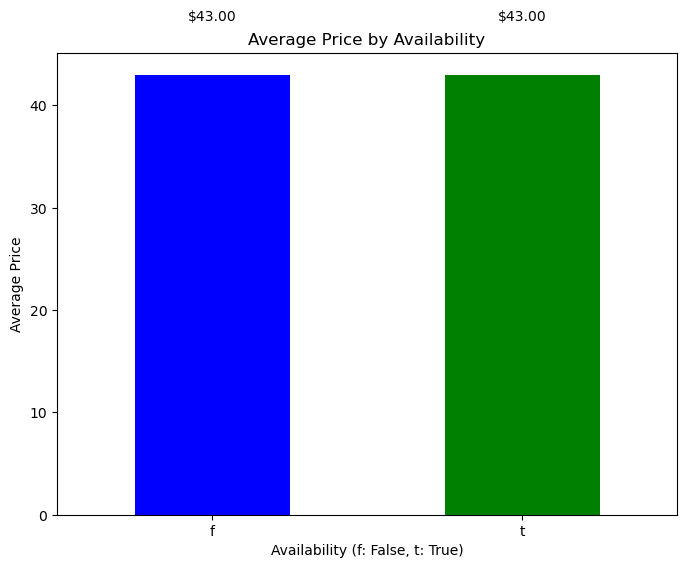

In [20]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
id_6422['price'] = id_6422['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = id_6422.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Time Series of Date and Availability

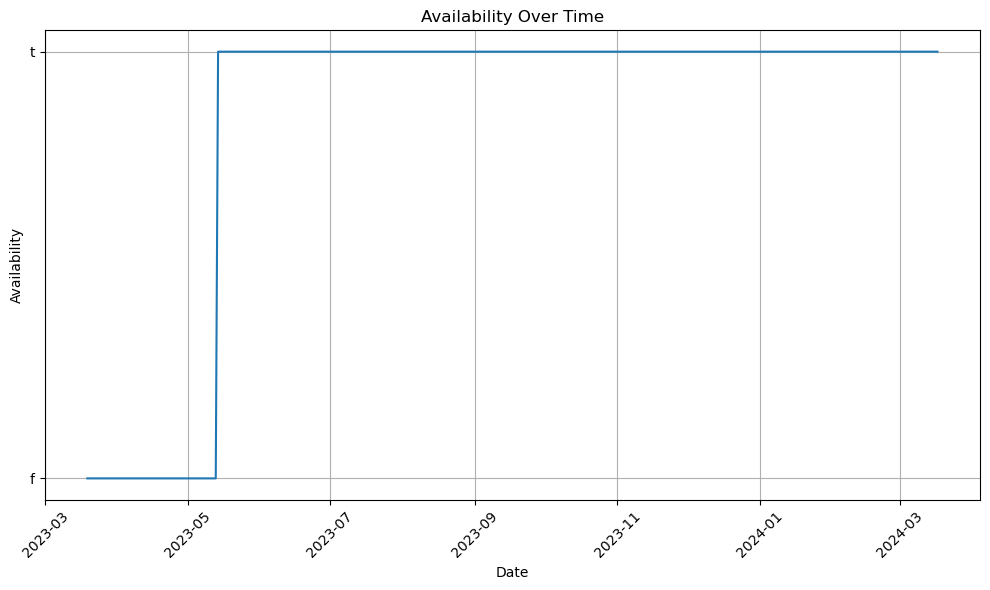

In [21]:

# Convert 'date' column to datetime format
id_6422['date'] = pd.to_datetime(id_6422['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(id_6422['date'], id_6422['available'], linestyle='-')
plt.title('Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


long rent??

<Figure size 1000x600 with 0 Axes>

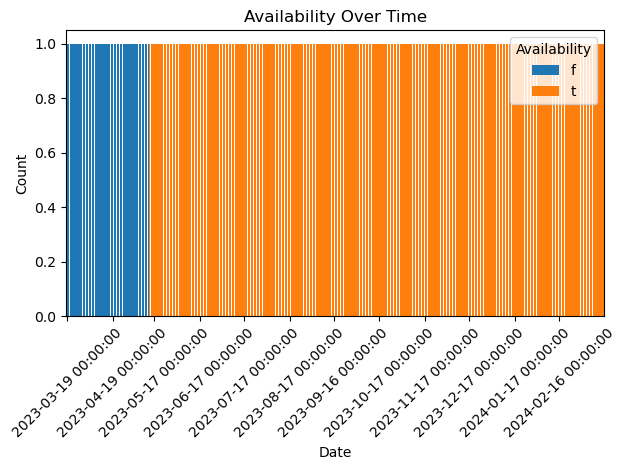

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Convert 'date' column to datetime format
#id_5456['date'] = pd.to_datetime(id_5456['date'])

# Count the number of occurrences of each availability status for each date
availability_counts = id_6422.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True, width=0.8)
plt.title('Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Availability')

# Set x-axis ticks to be one month apart
plt.gca().xaxis.set_major_locator(MonthLocator())

plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


## With the Whole dataset

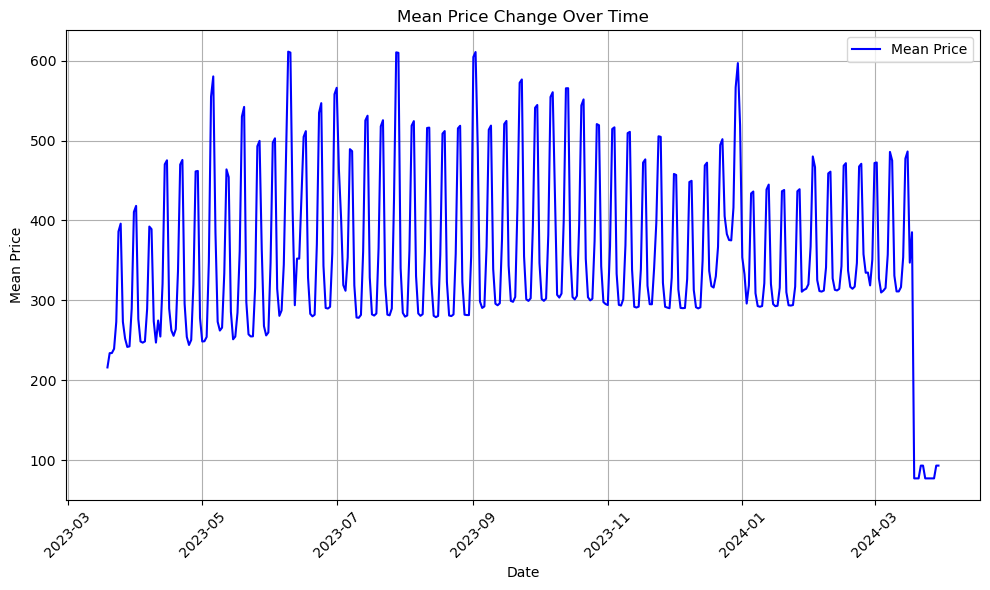

In [23]:
# Assuming you have the data in a DataFrame named calendar
calendar['date'] = pd.to_datetime(calendar['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = calendar.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

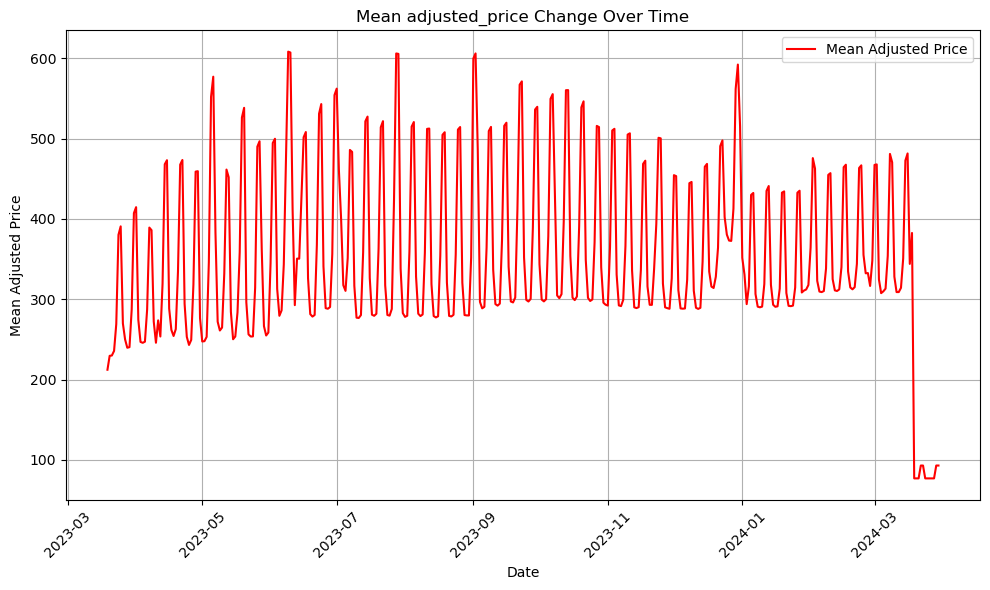

In [24]:
# Assuming you have the data in a DataFrame named calendar
calendar['date'] = pd.to_datetime(calendar['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = calendar.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

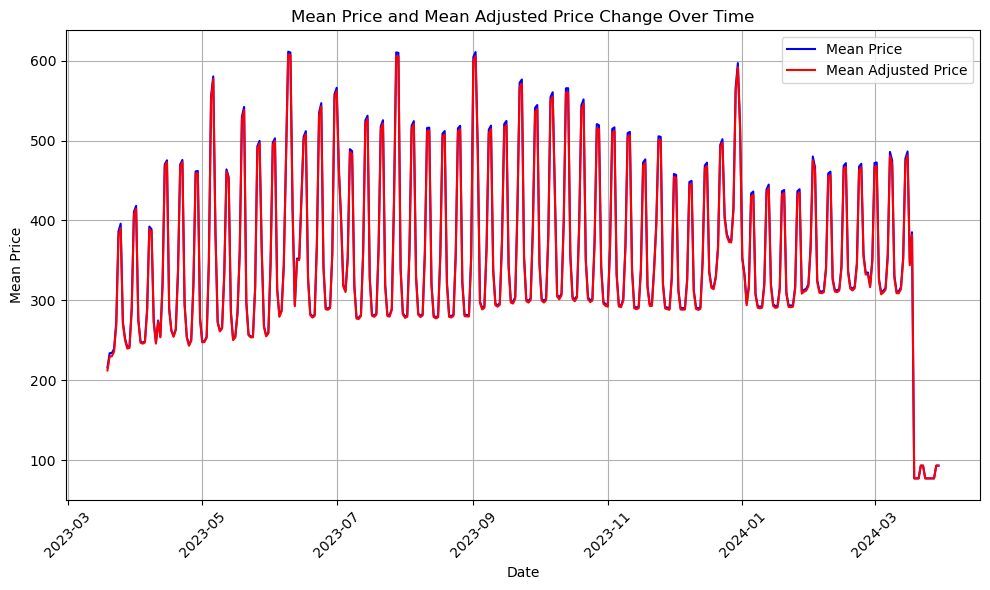

In [25]:

calendar['date'] = pd.to_datetime(calendar['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = calendar.groupby('date')['price'].mean()

# Convert 'adjusted_price' column to numeric after removing the dollar sign and converting to float
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean adjusted price for each day
mean_adjusted_price_by_date = calendar.groupby('date')['adjusted_price'].mean()

# Plotting both mean price and mean adjusted price on the same plot
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')

plt.title('Mean Price and Mean Adjusted Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [26]:
# Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
calendar['price_difference'] = calendar['price'] - calendar['adjusted_price']

# Display rows where there is a difference
print(len(calendar[calendar['price_difference'] != 0]))

217534


### Does Availability Change the Price?

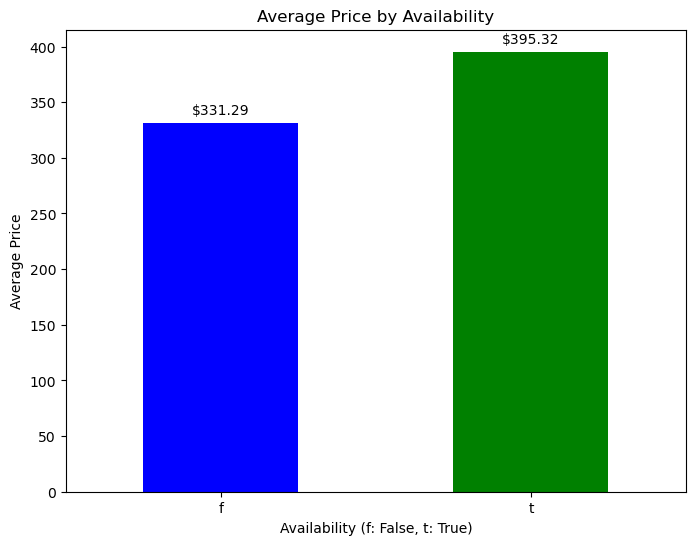

In [27]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = calendar.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Time Series of Date and Availability

<Figure size 1000x600 with 0 Axes>

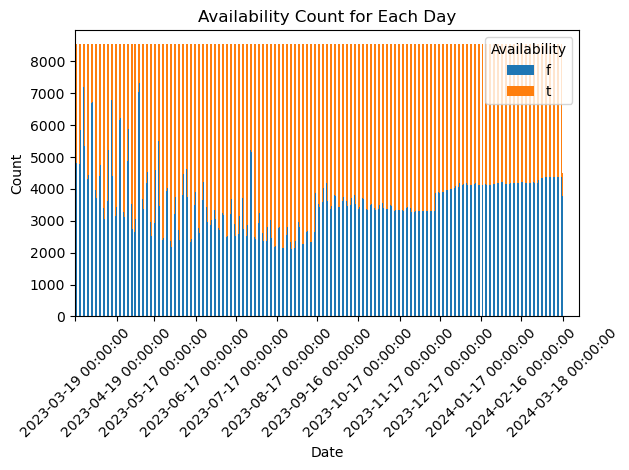

In [28]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
calendar['date'] = pd.to_datetime(calendar['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


# Listings

In [29]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,39870,Close to Vanderbilt 2,171184,Evelyn,NaN,District 18,36.125,-86.813,Private room,70,1,349,2023-02-26,4.410,1,174,68,NaN
1,6422,Nashville Charm,12172,Michele,NaN,District 6,36.173,-86.736,Private room,43,30,674,2020-03-03,3.990,1,309,0,NaN
2,421290,Private Entry Studio Suite/King/Wetbar/DT 5 min,1684051,Rick,NaN,District 19,36.172,-86.793,Entire home/apt,261,2,979,2023-03-09,7.460,7,11,65,NaN
3,72906,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,176117,Richard,NaN,District 18,36.131,-86.801,Entire home/apt,100,2,677,2023-03-16,4.720,1,96,55,NaN
4,430052,"Private Vaulted Suite! King,Wet Bar,Bath/5 min...",1684051,Rick,NaN,District 19,36.172,-86.793,Entire home/apt,262,2,981,2023-03-09,7.480,7,7,72,NaN


In [30]:
simple_eda(listings)

Basic Structure:
Number of Rows: 8548
Number of Columns: 18

Missing Values by Column:
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               8548
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1188
reviews_per_month                 1188
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8548
dtype: int64 

Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_gr

## Room Type Distribution

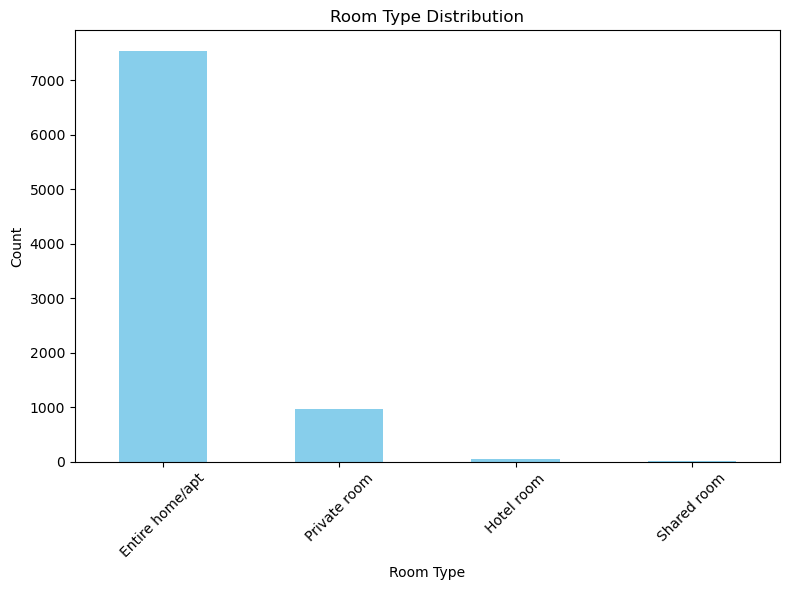

In [31]:
import matplotlib.pyplot as plt

# Plotting Room Type Distribution
plt.figure(figsize=(8, 6))
listings['room_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Price Distribution

#### Whole DF

In [32]:
print("Min Price:", min(listings['price']))
print("Max Price:", max(listings['price']))
print("Avg Price:", listings['price'].mean())
print("Median Price:", listings['price'].median())

Min Price: 0
Max Price: 78200
Avg Price: 281.60400093589146
Median Price: 198.0


#### For each room type

In [33]:
import pandas as pd

# Group by room type and calculate statistics
room_type_stats = listings.groupby('room_type')['price'].agg(['min', 'max', 'mean', 'median'])

# Print statistics for each room type
for room_type, stats in room_type_stats.iterrows():
    print(f"Room Type: {room_type}")
    print(f"Min Price: {stats['min']}")
    print(f"Max Price: {stats['max']}")
    print(f"Avg Price: {stats['mean']}")
    print(f"Median Price: {stats['median']}")
    print()


Room Type: Entire home/apt
Min Price: 10.0
Max Price: 78200.0
Avg Price: 289.57815817409767
Median Price: 209.0

Room Type: Hotel room
Min Price: 0.0
Max Price: 10000.0
Avg Price: 738.5333333333333
Median Price: 241.0

Room Type: Private room
Min Price: 20.0
Max Price: 2950.0
Avg Price: 198.6687565308255
Median Price: 90.0

Room Type: Shared room
Min Price: 26.0
Max Price: 500.0
Avg Price: 153.0
Median Price: 80.5



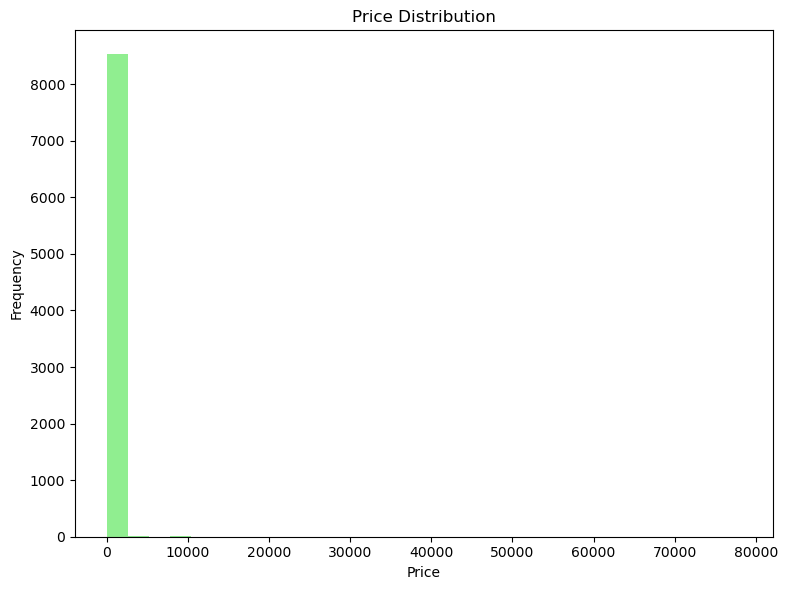

In [34]:
# Plotting Price Distribution
plt.figure(figsize=(8, 6))
plt.hist(listings['price'], bins=30, color='lightgreen')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


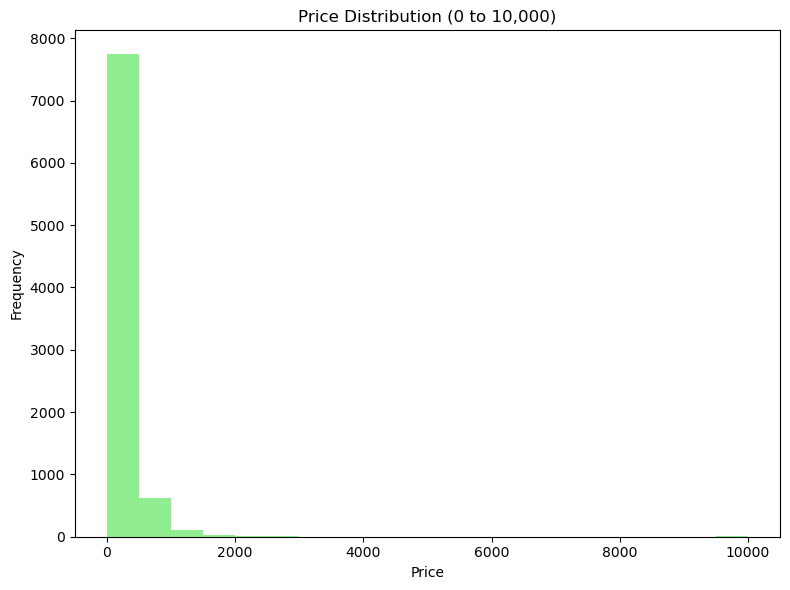

In [43]:
# Limiting each value in the prices between 0 and 10,000
limited_prices = [max(0, min(10000, val)) for val in listings['price']]

# Plotting Price Distribution with modified range
plt.figure(figsize=(8, 6))
plt.hist(limited_prices, bins=20, color='lightgreen')
plt.title('Price Distribution (0 to 10,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

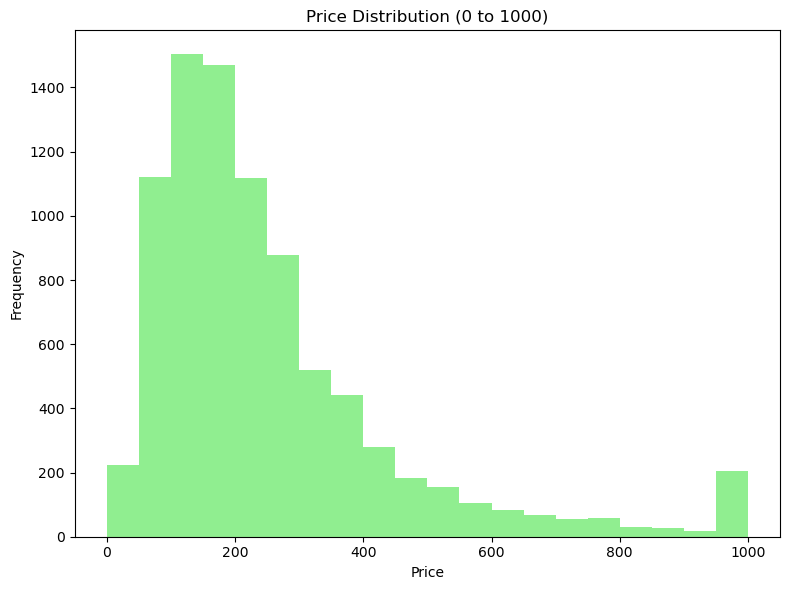

In [42]:
# Limiting each value in the prices between 0 and 10,000
limited_prices = [max(0, min(1000, val)) for val in listings['price']]

# Plotting Price Distribution with modified range
plt.figure(figsize=(8, 6))
plt.hist(limited_prices, bins=20, color='lightgreen')
plt.title('Price Distribution (0 to 1000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Pricing Dist for each room type

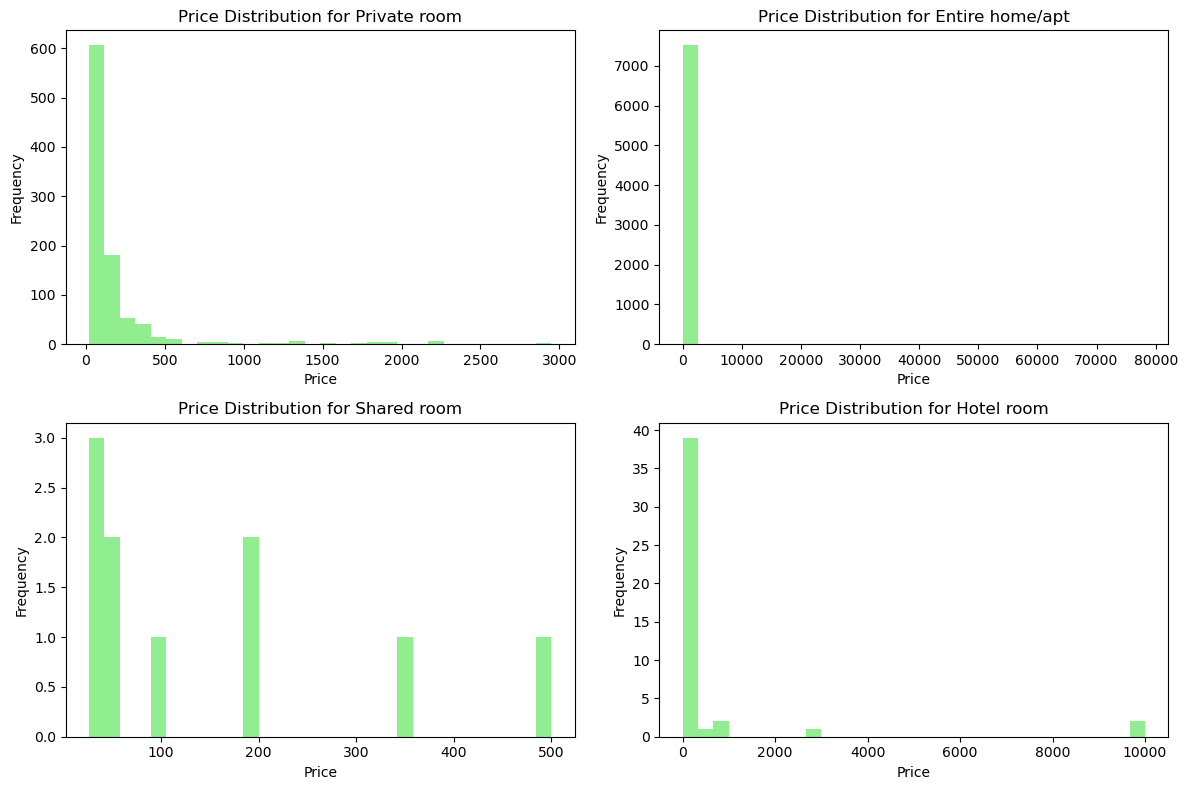

In [37]:
# Unique room types
room_types = listings['room_type'].unique()

# Plotting Price Distribution for each room type
plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    plt.subplot(2, 2, i)
    plt.hist(listings[listings['room_type'] == room_type]['price'], bins=30, color='lightgreen')
    plt.title(f'Price Distribution for {room_type}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

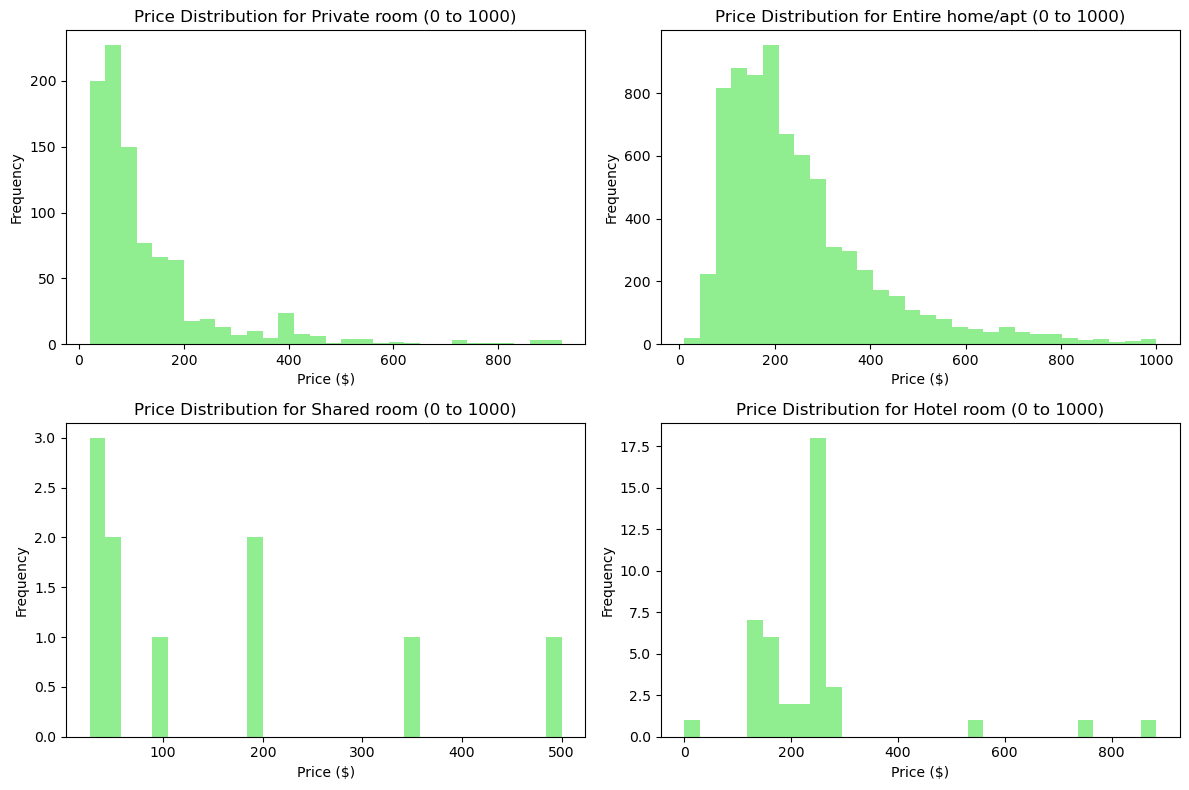

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Filtering to include only prices between 0 and 10000
filtered_listings = listings[(listings['price'] >= 0) & (listings['price'] <= 1000)]

# Unique room types
room_types = filtered_listings['room_type'].unique()

# Plotting Price Distribution for each room type
plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    # Filter each room type by the specified price range
    room_prices = filtered_listings[filtered_listings['room_type'] == room_type]['price']
    
    # Adjust subplot for each room type
    plt.subplot(2, 2, min(i, 4))  # Ensure subplot index doesn't exceed layout size
    plt.hist(room_prices, bins=30, color='lightgreen')
    plt.title(f'Price Distribution for {room_type} (0 to 1000)')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


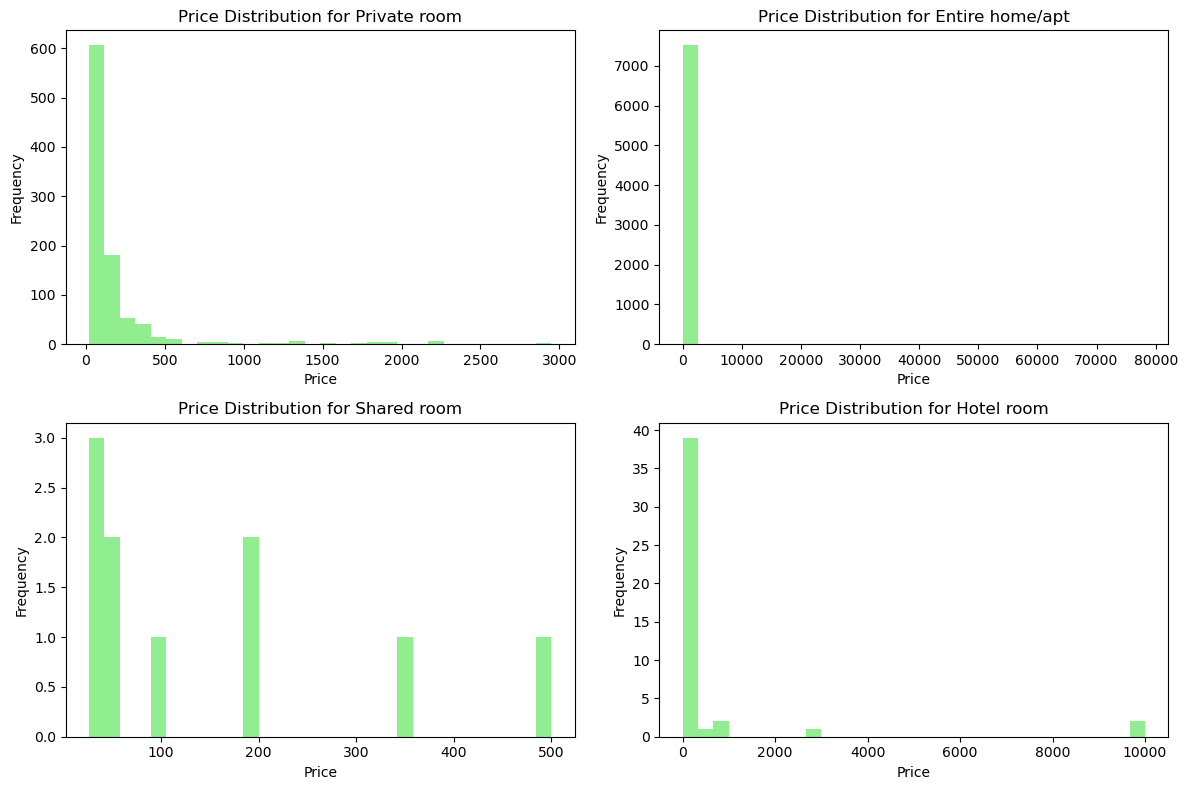

In [44]:
# Unique room types
room_types = listings['room_type'].unique()

# Plotting Price Distribution for each room type
plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    plt.subplot(2, 2, i)
    plt.hist(listings[listings['room_type'] == room_type]['price'], bins=30, color='lightgreen')
    plt.title(f'Price Distribution for {room_type}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

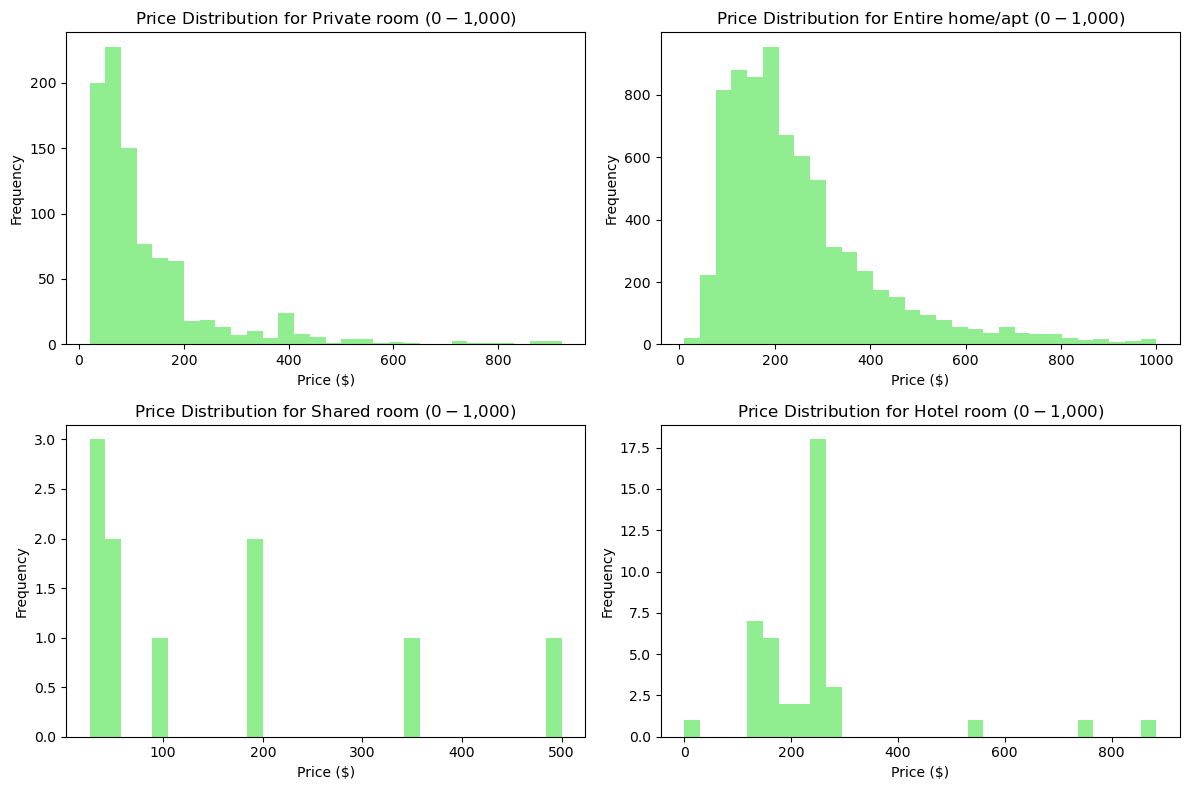

In [46]:
# Defining the price range you're interested in
min_price = 0
max_price = 1000

# Unique room types
room_types = listings['room_type'].unique()

# Plotting Price Distribution for each room type within the specified price range
plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    # Filtering listings for each room type within the specified price range
    filtered_prices = listings[(listings['room_type'] == room_type) & (listings['price'] >= min_price) & (listings['price'] <= max_price)]['price']
    
    plt.subplot(2, 2, i)
    plt.hist(filtered_prices, bins=30, color='lightgreen')  
    plt.title(f'Price Distribution for {room_type} ($0 - $1,000)')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Neighborhood Distribution

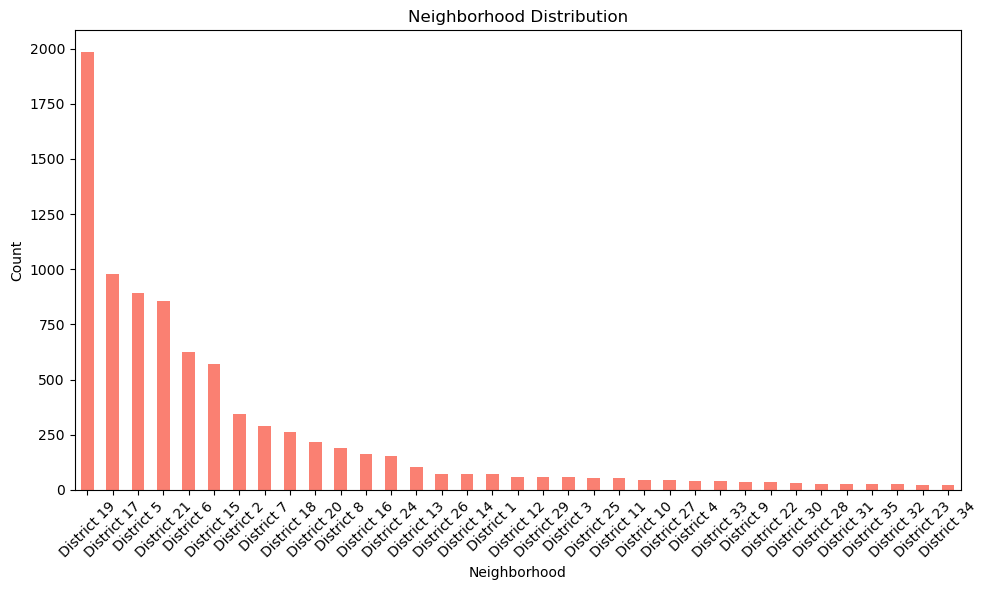

In [47]:
neighborhood_counts = listings['neighbourhood'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='salmon')
plt.title('Neighborhood Distribution')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Price Dist for each neighborhood

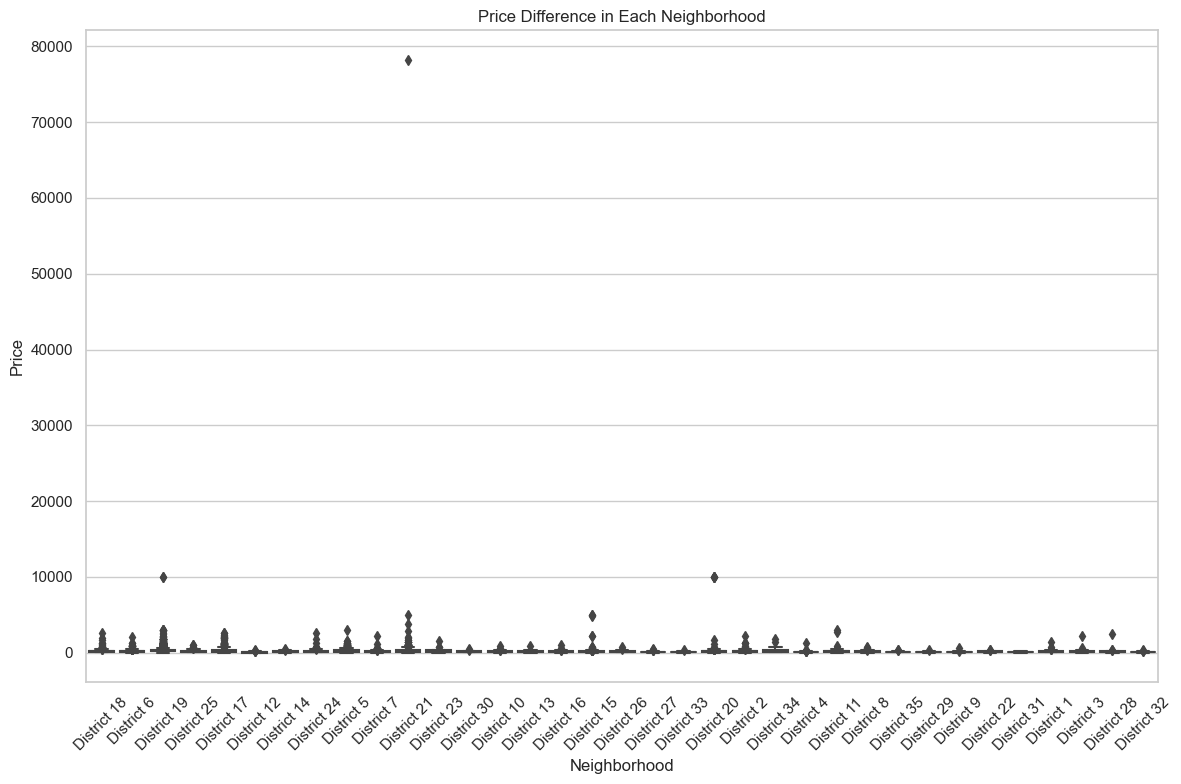

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=listings)
plt.title('Price Difference in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Avg Price for each neighborhood

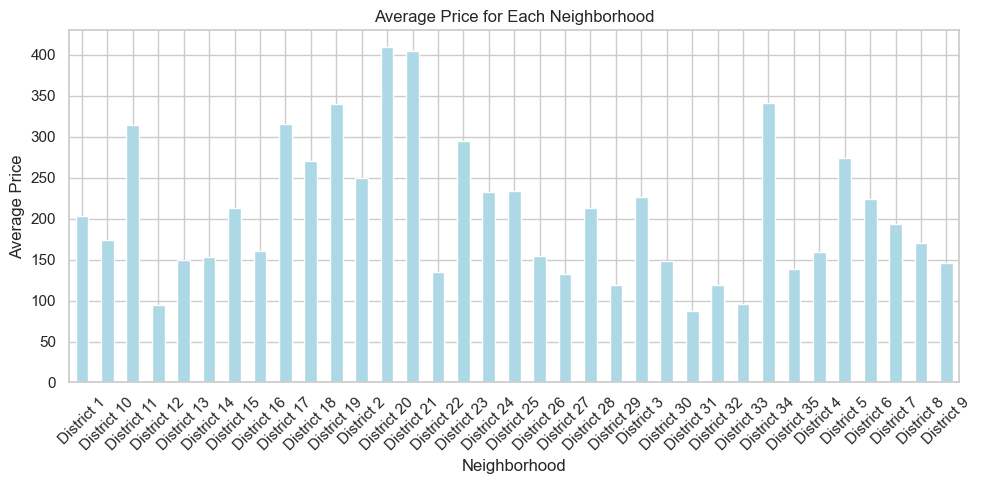

In [49]:
import matplotlib.pyplot as plt

# Calculate average price for each neighborhood
avg_price_neighborhood = listings.groupby('neighbourhood')['price'].mean()

# Plotting
plt.figure(figsize=(10, 5))
avg_price_neighborhood.plot(kind='bar', color='lightblue')
plt.title('Average Price for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Avg Price for each neighborhood FOR 0 REVIEW

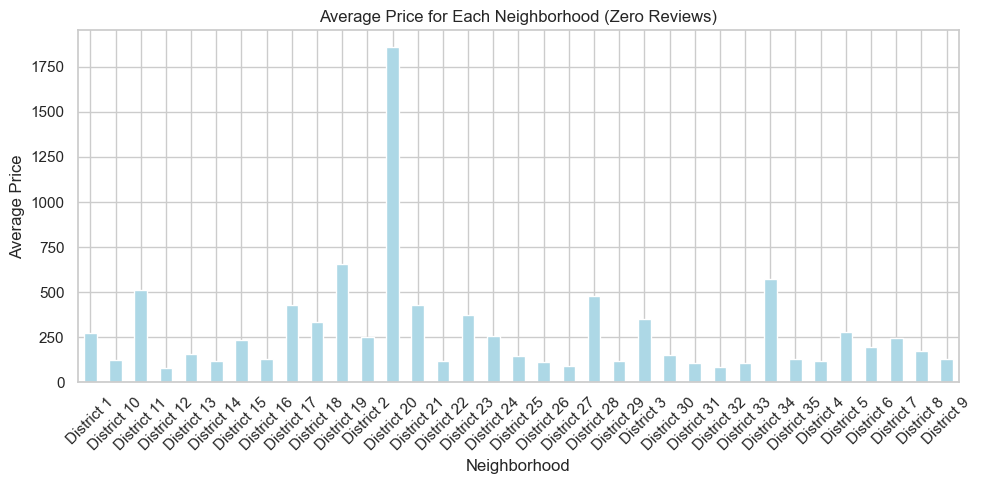

In [50]:
import matplotlib.pyplot as plt

# Filter rows where number of reviews is 0
zero_reviews = listings[listings['number_of_reviews'] == 0]

# Calculate average price for each neighborhood
avg_price_neighborhood_zero_reviews = zero_reviews.groupby('neighbourhood')['price'].mean()

# Plotting
plt.figure(figsize=(10, 5))
avg_price_neighborhood_zero_reviews.plot(kind='bar', color='lightblue')
plt.title('Average Price for Each Neighborhood (Zero Reviews)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


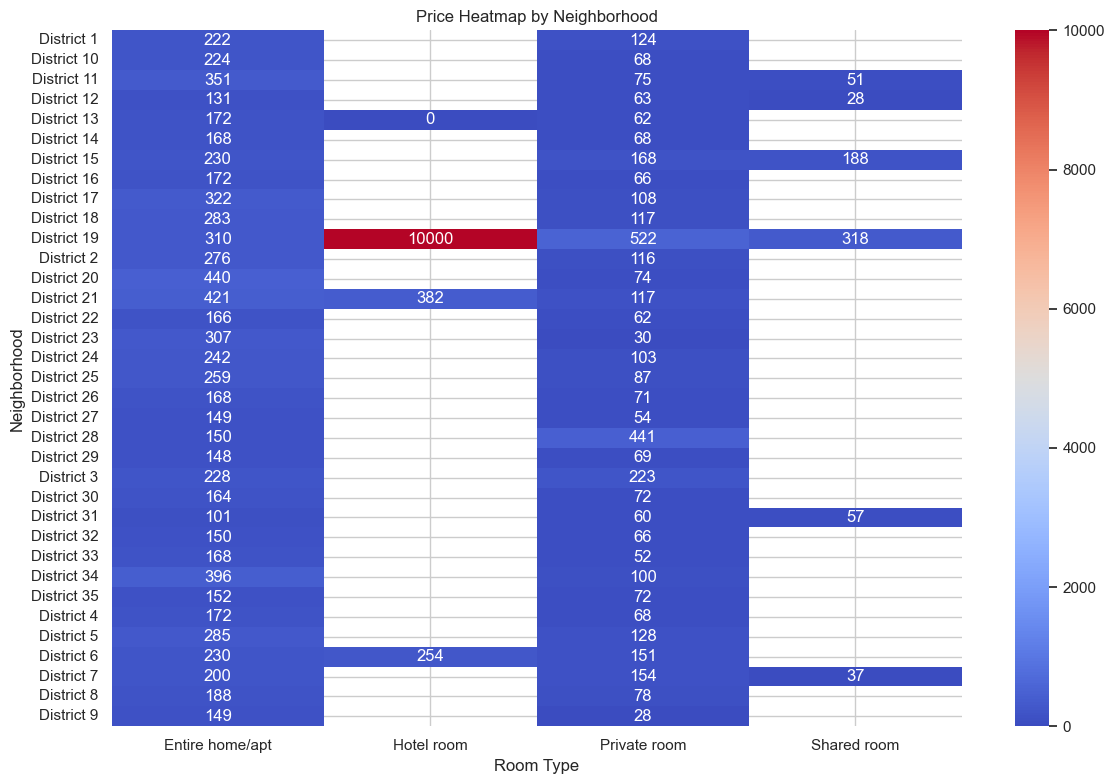

In [51]:
import seaborn as sns

# Creating Price Heatmap by Neighborhood
plt.figure(figsize=(12, 8))
heatmap_data = listings.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Price Heatmap by Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


## # of review VS Reviews Per Month

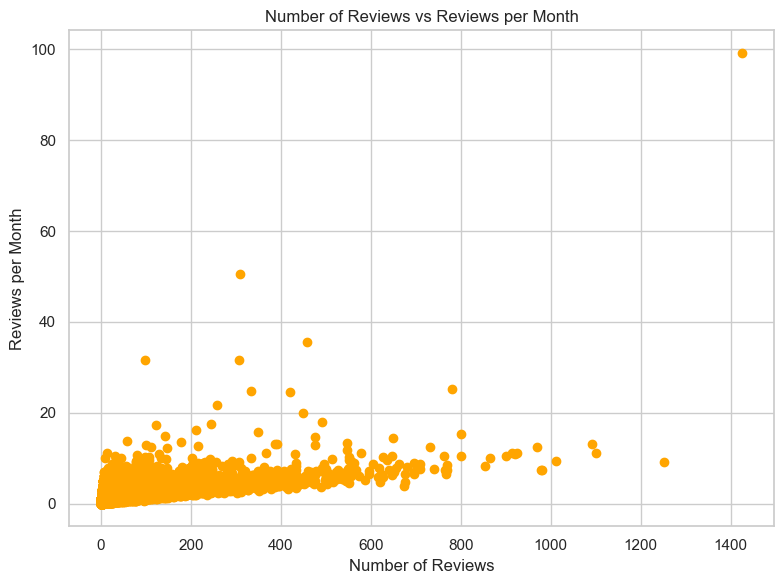

In [52]:
# Scatter plot Number of Reviews vs Reviews per Month
plt.figure(figsize=(8, 6))
plt.scatter(listings['number_of_reviews'], listings['reviews_per_month'], color='orange')
plt.title('Number of Reviews vs Reviews per Month')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.tight_layout()
plt.show()


## Price vs. Number of Reviews

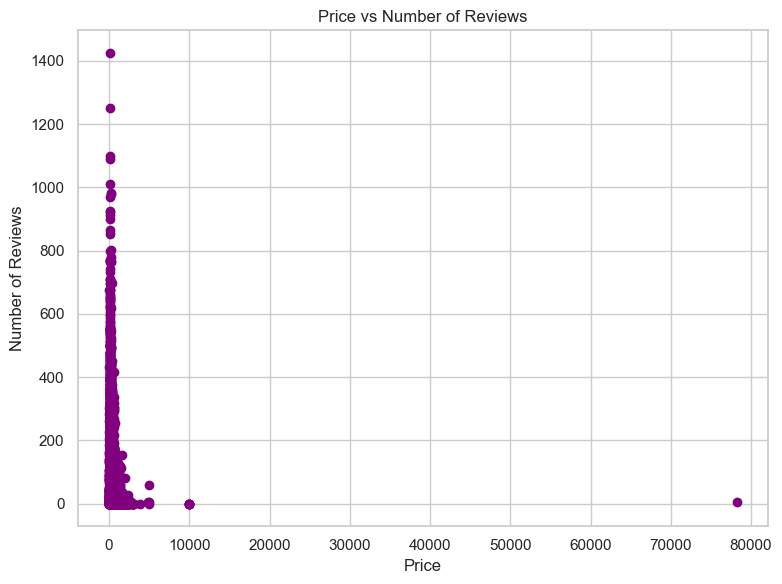

In [53]:
# Scatter plot Price vs Number of Reviews
plt.figure(figsize=(8, 6))
plt.scatter(listings['price'], listings['number_of_reviews'], color='purple')
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


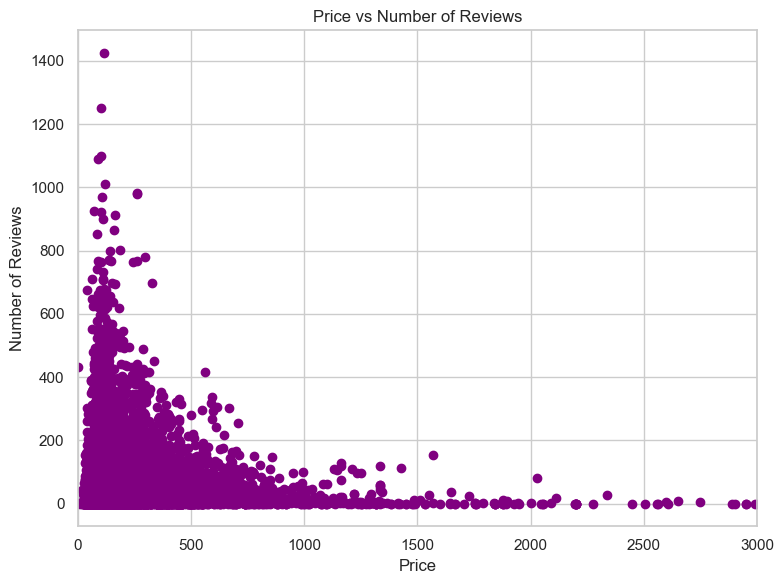

In [60]:
# Scatter plot Price vs Number of Reviews
plt.figure(figsize=(8, 6))
plt.scatter(listings['price'], listings['number_of_reviews'], color='purple')
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.xlim(0, 3000)
plt.tight_layout()
plt.show()

### Number of Reviews FOR EACH NEIGHBOR

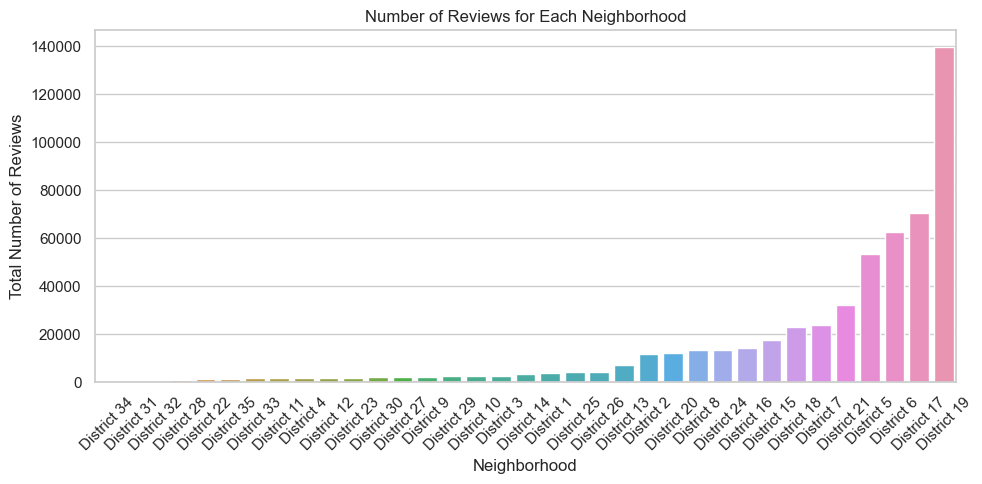

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings.groupby('neighbourhood')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Zero Reviews for Neighborhood

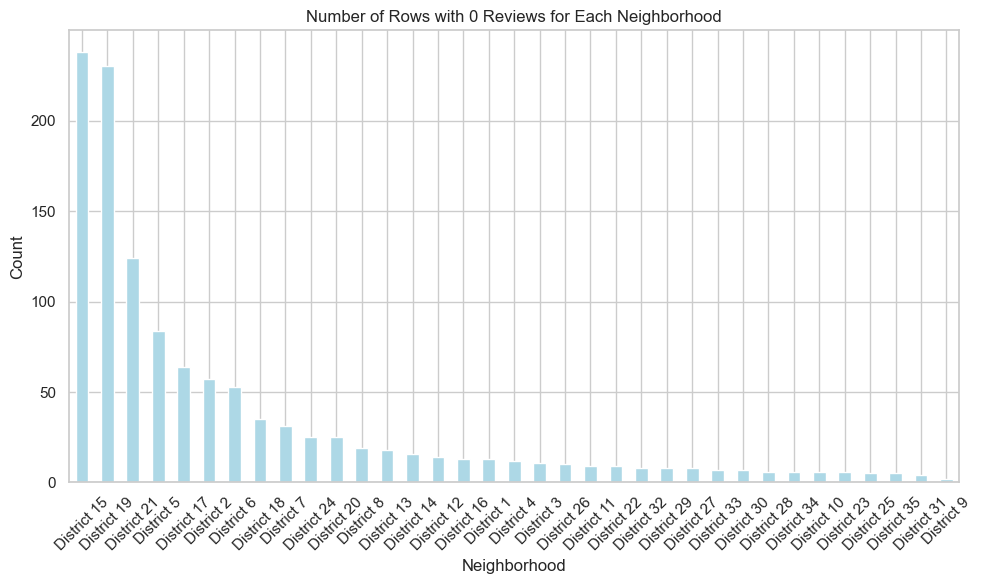

In [61]:
import matplotlib.pyplot as plt

# Filter rows where number of reviews is 0
zero_reviews = listings[listings['number_of_reviews'] == 0]

# Calculate the count of such rows for each neighborhood
zero_reviews_by_neighborhood = zero_reviews['neighbourhood'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
zero_reviews_by_neighborhood.plot(kind='bar', color='lightblue')
plt.title('Number of Rows with 0 Reviews for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Zero Reviews Price

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/3388695239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_reviews['price_bin'] = pd.cut(zero_reviews['price'], bins=price_bins)


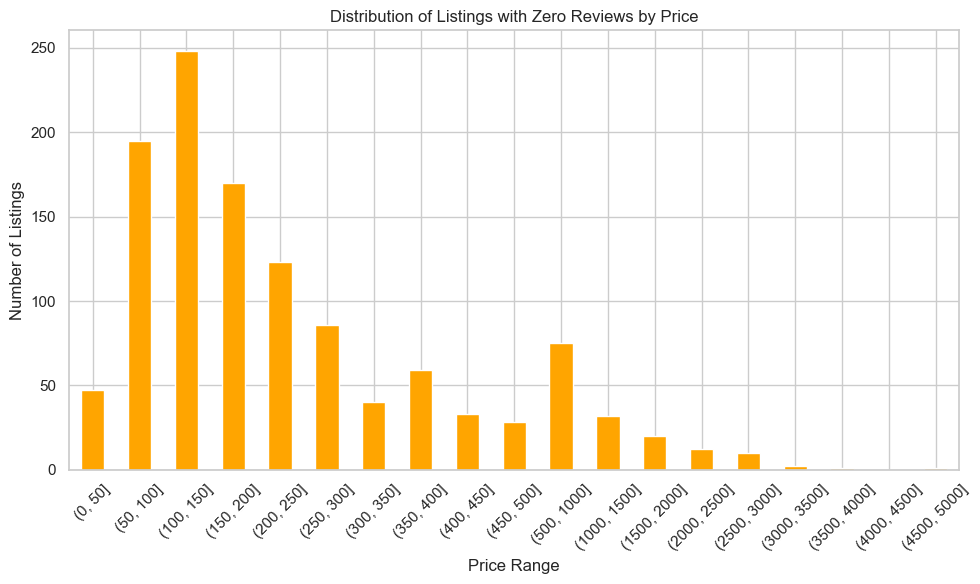

In [62]:
import matplotlib.pyplot as plt

# Define price ranges
price_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Cut prices into bins and count number of listings with zero reviews in each bin
zero_reviews['price_bin'] = pd.cut(zero_reviews['price'], bins=price_bins)
zero_reviews_by_price = zero_reviews['price_bin'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
zero_reviews_by_price.plot(kind='bar', color='orange')
plt.title('Distribution of Listings with Zero Reviews by Price')
plt.xlabel('Price Range')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Availability Dist

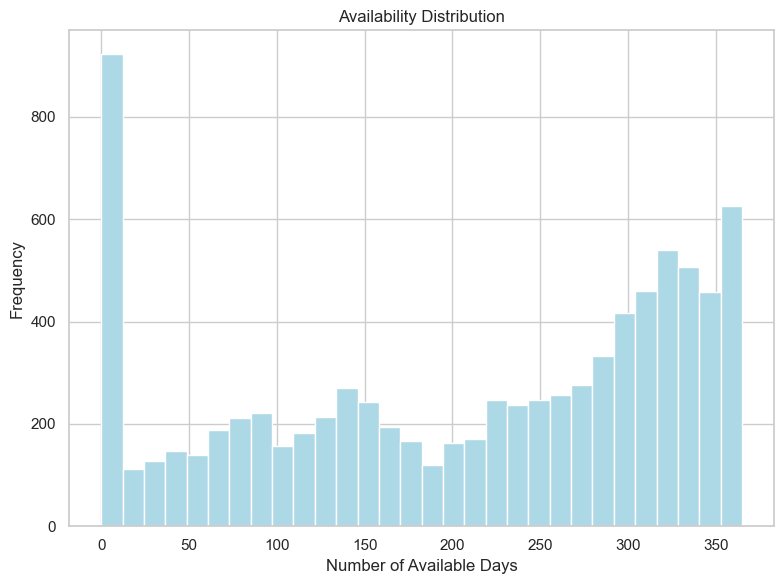

In [63]:
# Plotting Availability Distribution
plt.figure(figsize=(8, 6))
plt.hist(listings['availability_365'], bins=30, color='lightblue')
plt.title('Availability Distribution')
plt.xlabel('Number of Available Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Host Listings Count Distribution:

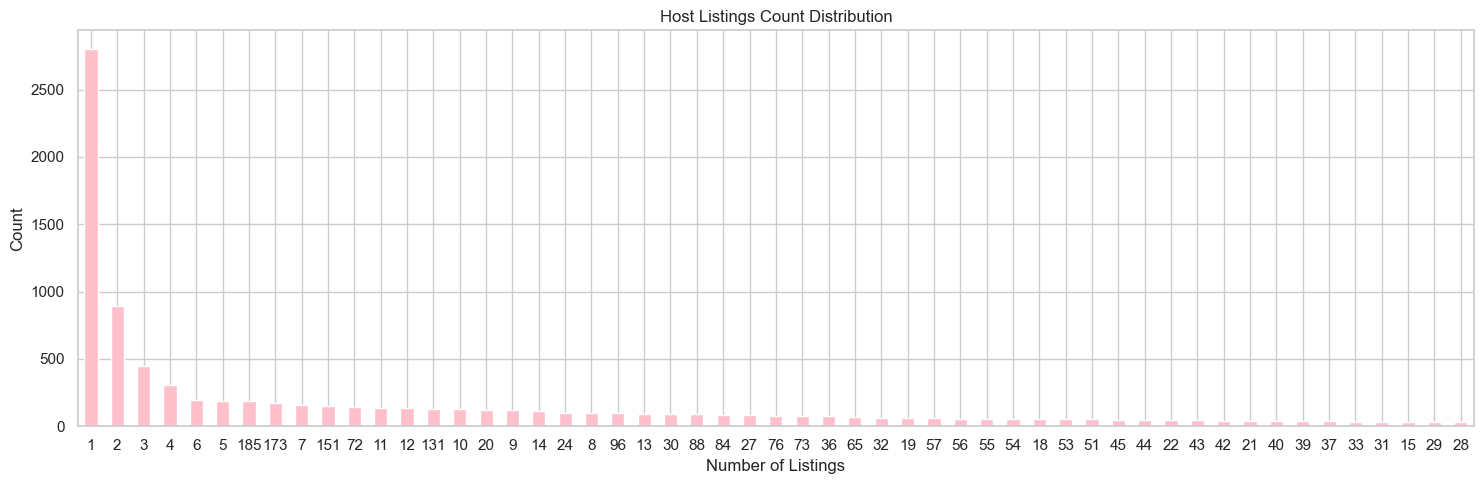

In [64]:
# Plotting Host Listings Count Distribution
plt.figure(figsize=(15, 5))
listings['calculated_host_listings_count'].value_counts().plot(kind='bar', color='pink')
plt.title('Host Listings Count Distribution')
plt.xlabel('Number of Listings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Listings Detailed

In [65]:
listings_detailed.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20230319180930,2023-03-19,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.960,4.920,4.980,NaN,f,1,0,1,0,3.990
1,39870,https://www.airbnb.com/rooms/39870,20230319180930,2023-03-19,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.970,4.950,4.940,NaN,f,1,0,1,0,4.410
2,3648549,https://www.airbnb.com/rooms/3648549,20230319180930,2023-03-20,city scrape,"Serene, Cozy Getaway; Lipscomb, Vanderbilt,12S...",*Our Airbnb is professionally cleaned & disinf...,Green Hills is a PRIME location and much sough...,https://a0.muscache.com/pictures/482b8166-d993...,931636,...,4.970,4.940,4.930,NaN,f,1,1,0,0,1.810
3,72906,https://www.airbnb.com/rooms/72906,20230319180930,2023-03-20,city scrape,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire top floor. Private. 800 sq ft of bright...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/58602855/3788...,176117,...,4.990,4.960,4.890,NaN,f,1,1,0,0,4.720
4,421290,https://www.airbnb.com/rooms/421290,20230319180930,2023-03-20,city scrape,Private Entry Studio Suite/King/Wetbar/DT 5 min,Free Parking! Gorgeous private suite with ever...,I do love this neighborhood! 2 blocks from the...,https://a0.muscache.com/pictures/ad1f75a3-e2a6...,1684051,...,4.960,4.800,4.930,NaN,f,7,7,0,0,7.460


In [66]:
simple_eda(listings_detailed)

Basic Structure:
Number of Rows: 8548
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1188
Length: 75, dtype: int64 

Data Types:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
           

**note that numeric values for review rating is in this dataset**

## # of bedroom and price

In [67]:
listings_detailed['bedrooms']

0      1.000
1      1.000
2      1.000
3      2.000
4      1.000
        ... 
8543   3.000
8544   6.000
8545   2.000
8546   2.000
8547   3.000
Name: bedrooms, Length: 8548, dtype: float64

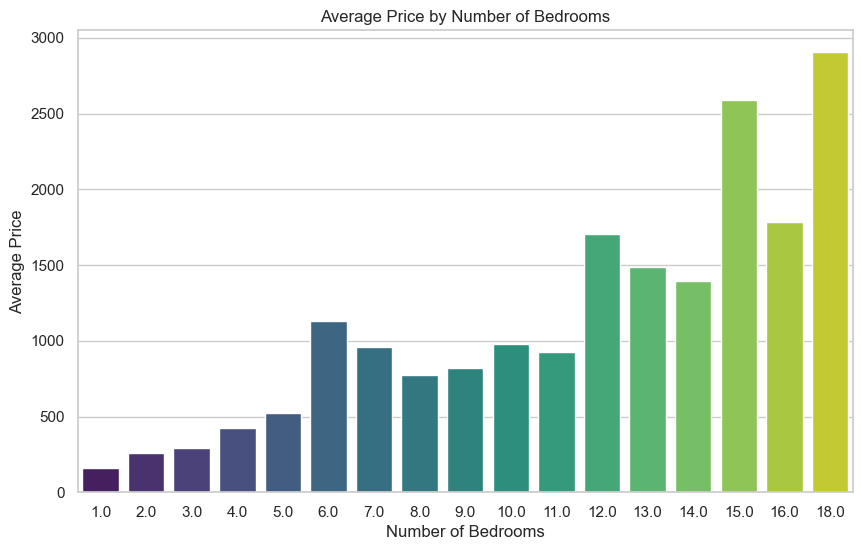

In [68]:
listings_detailed['price'] = listings_detailed['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by number of bedrooms and calculate average price
avg_price_by_bedrooms = listings_detailed.groupby('bedrooms')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms, palette='viridis')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


## # of Bathroom and Price

In [69]:
listings_detailed['bathrooms_text']

0       1 private bath
1       1 private bath
2               1 bath
3               1 bath
4               1 bath
             ...      
8543            1 bath
8544         6.5 baths
8545            1 bath
8546            1 bath
8547           2 baths
Name: bathrooms_text, Length: 8548, dtype: object

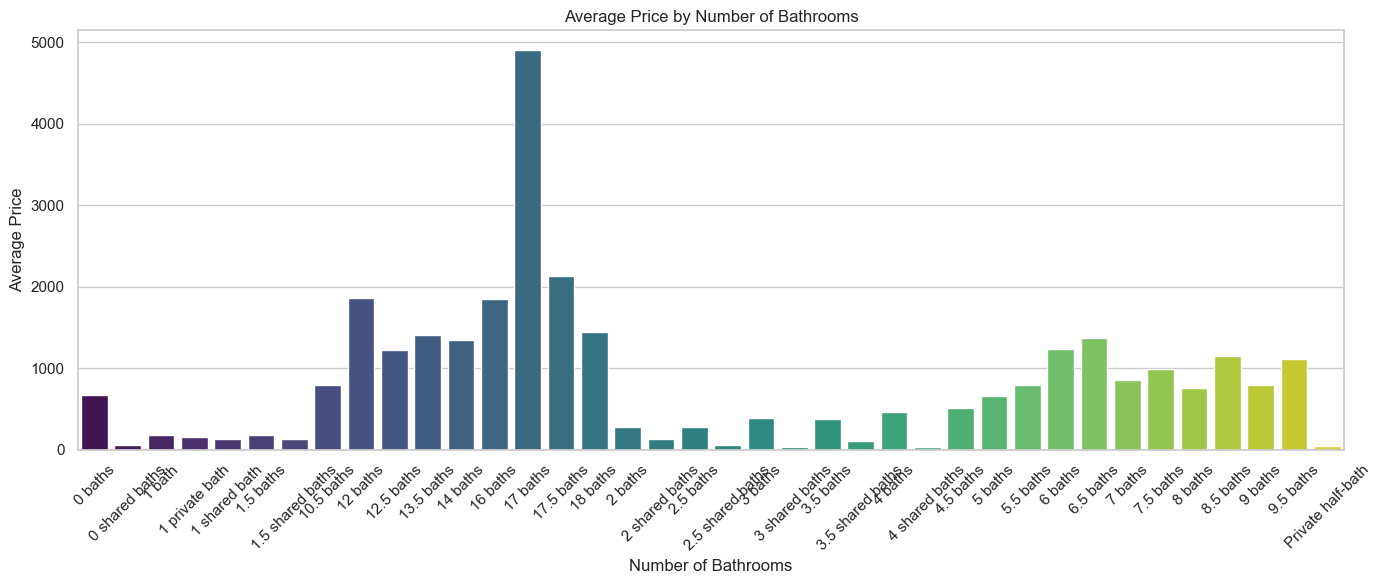

In [70]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_detailed['price'] = listings_detailed['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_bathrooms = listings_detailed.groupby('bathrooms_text')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x='bathrooms_text', y='price', data=avg_price_by_bathrooms, palette='viridis')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
avg_price_by_bathrooms

,bathrooms_text,price
0,0 baths,671.500
1,0 shared baths,57.000
2,1 bath,185.849
3,1 private bath,155.702
4,1 shared bath,135.966
5,1.5 baths,183.098
6,1.5 shared baths,136.848
7,10.5 baths,791.000
8,12 baths,1861.556
9,12.5 baths,1223.000


## # of people allowed VS Price

In [191]:
listings_detailed['accommodates']

0         3
1         2
2         2
3         2
4         2
         ..
14363    10
14364     2
14365     5
14366     6
14367     5
Name: accommodates, Length: 14368, dtype: int64

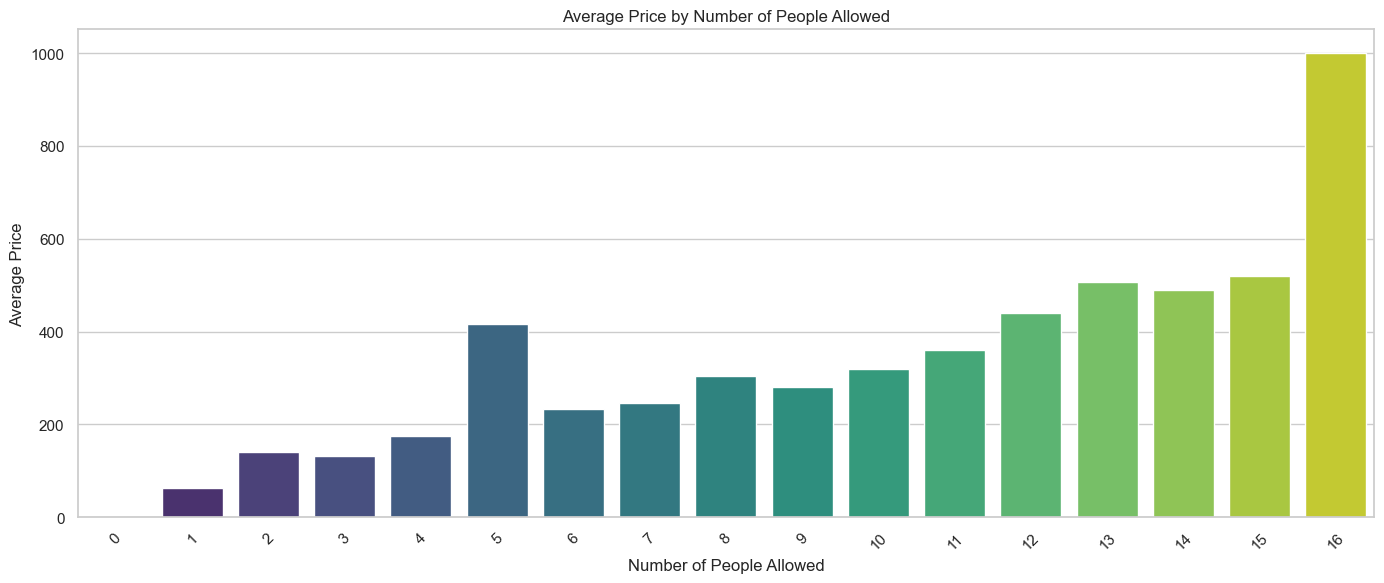

In [72]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_detailed['price'] = listings_detailed['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_detailed.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Amenities

In [73]:
listings_detailed['amenities']

0       ["Lock on bedroom door", "Iron", "Washer \u201...
1       ["Iron", "Keypad", "Luggage dropoff allowed", ...
2       ["Wine glasses", "Iron", "Body soap", "Private...
3       ["Iron", "Luggage dropoff allowed", "Wifi", "W...
4       ["Wine glasses", "Iron", "Body soap", "Private...
                              ...                        
8543    ["Free parking on premises", "Wifi", "Washer",...
8544    ["Wine glasses", "Iron", "Body soap", "Freezer...
8545    ["Iron", "Dishwasher", "Stove", "Luggage dropo...
8546    ["Free parking on premises", "Security cameras...
8547    ["Exercise equipment", "Wine glasses", "Free d...
Name: amenities, Length: 8548, dtype: object

## Top 20 Amenities

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/817821645.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')


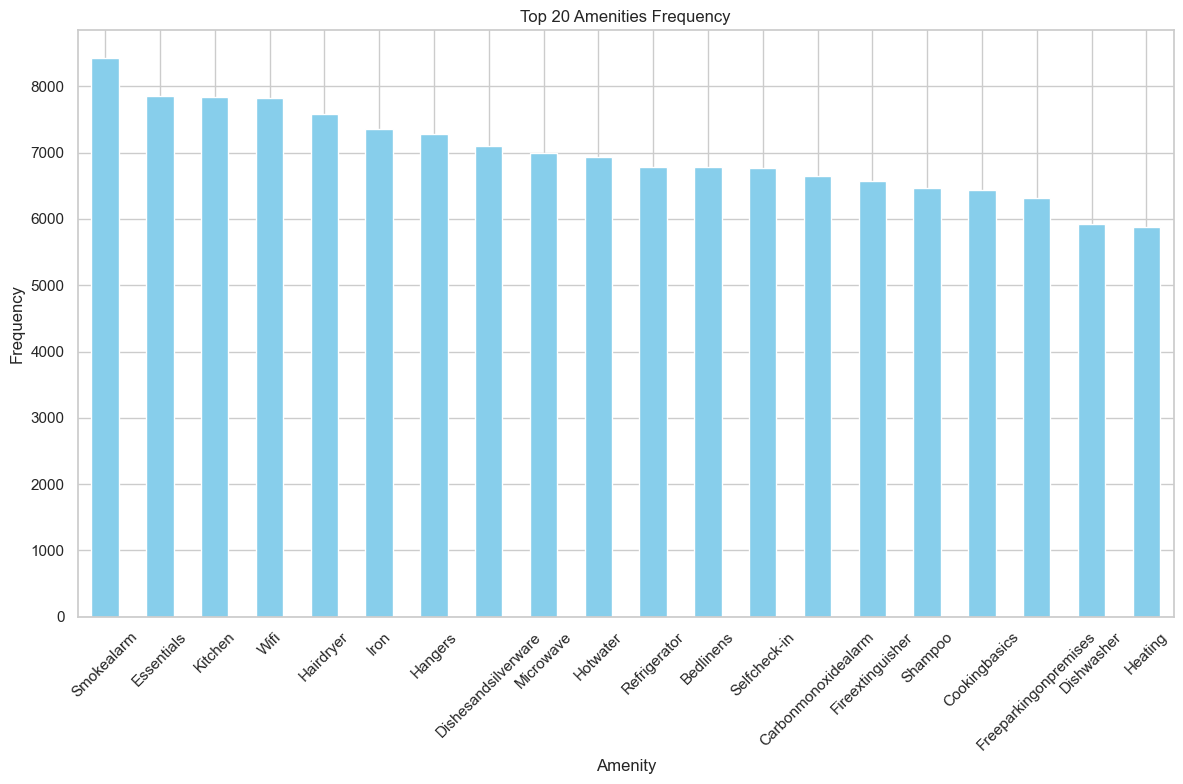

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listings_detailed['amenities'] contains the list of amenities for each listing

# Flatten the list of amenities
amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')

# Count the occurrences of each amenity
amenities_counts = pd.Series([amenity for sublist in amenities_list for amenity in sublist]).value_counts()

# Select the top 10 most common amenities
top_10_amenities = amenities_counts.head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_10_amenities.plot(kind='bar', color='skyblue')
plt.title('Top 20 Amenities Frequency')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
amenities_list

0       [Lockonbedroomdoor, Iron, Washer\u2013\u00a0In...
1       [Iron, Keypad, Luggagedropoffallowed, Freepark...
2       [Wineglasses, Iron, Bodysoap, Privateentrance,...
3       [Iron, Luggagedropoffallowed, Wifi, Washer, Co...
4       [Wineglasses, Iron, Bodysoap, Privateentrance,...
                              ...                        
8543    [Freeparkingonpremises, Wifi, Washer, Petsallo...
8544    [Wineglasses, Iron, Bodysoap, Freezer, TV, Pac...
8545    [Iron, Dishwasher, Stove, Luggagedropoffallowe...
8546    [Freeparkingonpremises, Securitycamerasonprope...
8547    [Exerciseequipment, Wineglasses, Freedryer\u20...
Name: amenities, Length: 8548, dtype: object

## Top 20 Amenities Of Bottom

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/3687810133.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')


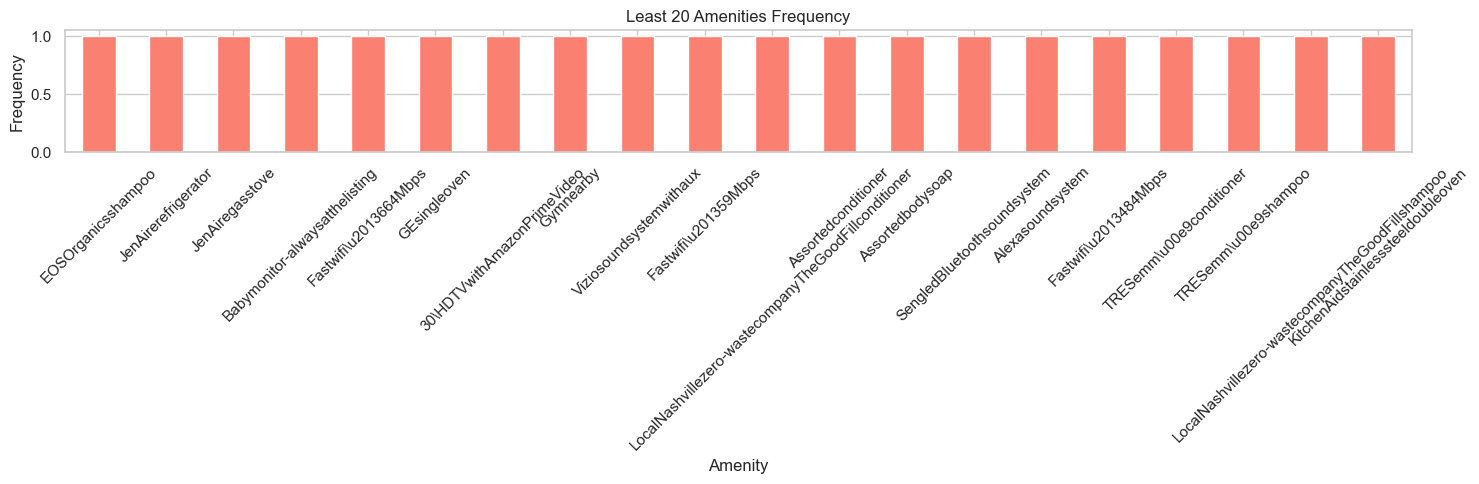

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listings_detailed['amenities'] contains the list of amenities for each listing

# Flatten the list of amenities
amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')

# Count the occurrences of each amenity
amenities_counts = pd.Series([amenity for sublist in amenities_list for amenity in sublist]).value_counts()

# Select the least 20 common amenities
least_20_amenities = amenities_counts.tail(20)

# Plotting
plt.figure(figsize=(15, 5))
least_20_amenities.plot(kind='bar', color='salmon')
plt.title('Least 20 Amenities Frequency')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Frequency of # of Amenities

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/2337878369.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)


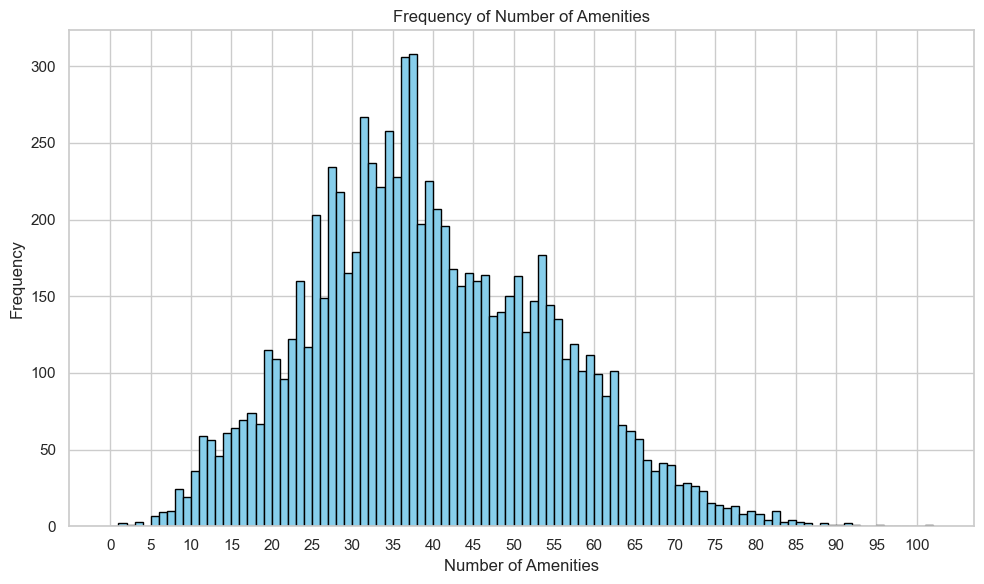

In [77]:
import matplotlib.pyplot as plt
# Count the number of amenities for each listing
listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(listings_detailed['num_amenities'], bins=range(0, max(listings_detailed['num_amenities']) + 1), color='skyblue', edgecolor='black')
plt.title('Frequency of Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Frequency')
plt.xticks(range(0, max(listings_detailed['num_amenities']) + 1, 5))
plt.tight_layout()
plt.show()


## # of Amenities and Price

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_25732/1563103122.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)


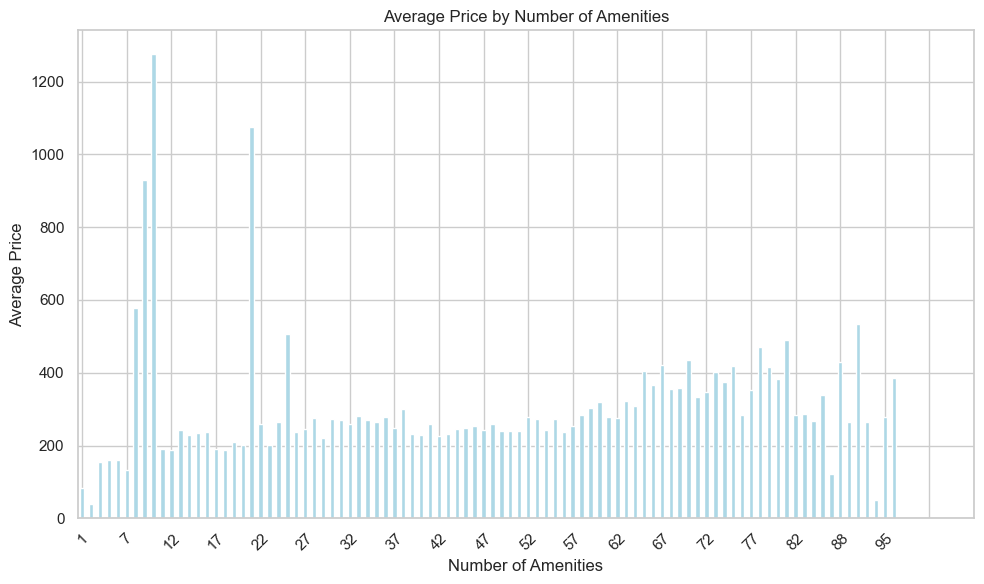

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listings_detailed['amenities'] contains the list of amenities for each listing

# Count the number of amenities for each listing
listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)

# Group the data by the number of amenities and calculate the average price
avg_price_by_amenities = listings_detailed.groupby('num_amenities')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_price_by_amenities.plot(kind='bar', color='lightblue')
plt.title('Average Price by Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.xticks(range(0, max(avg_price_by_amenities.index) + 1, 5))  # Adjust x-axis ticks
plt.tight_layout()
plt.show()


## Review

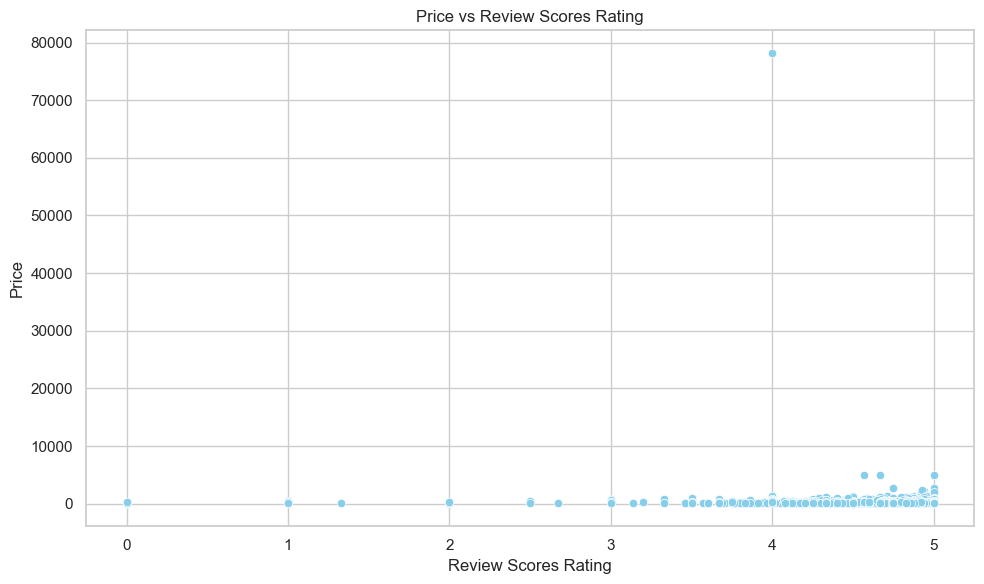

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings_detailed, color='skyblue')
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

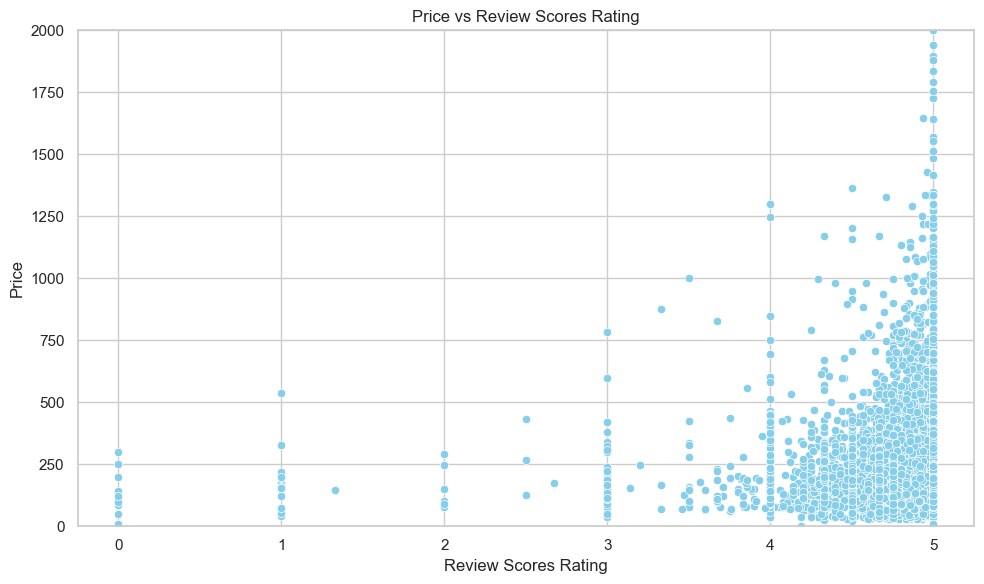

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings_detailed, color='skyblue')
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.ylim(0, 2000)
plt.tight_layout()
plt.show()

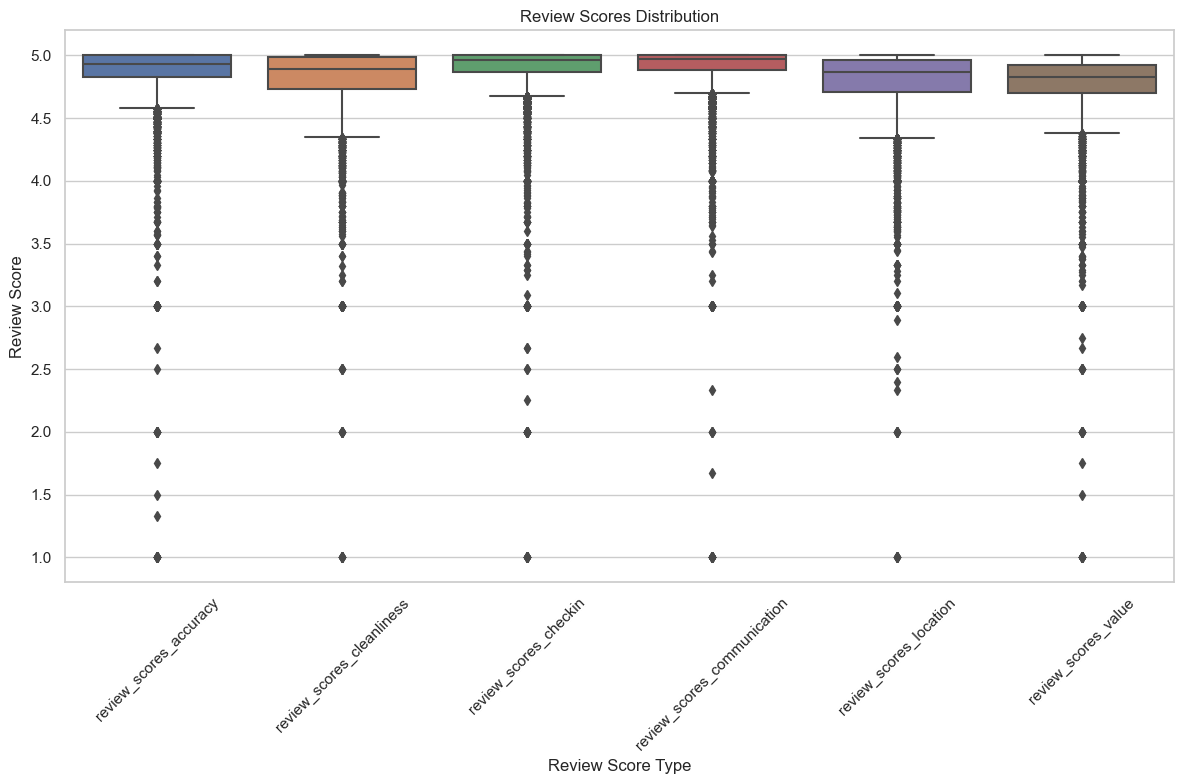

In [87]:
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value']

plt.figure(figsize=(12, 8))
sns.boxplot(data=listings_detailed[review_scores_columns])
plt.title('Review Scores Distribution')
plt.ylabel('Review Score')
plt.xlabel('Review Score Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


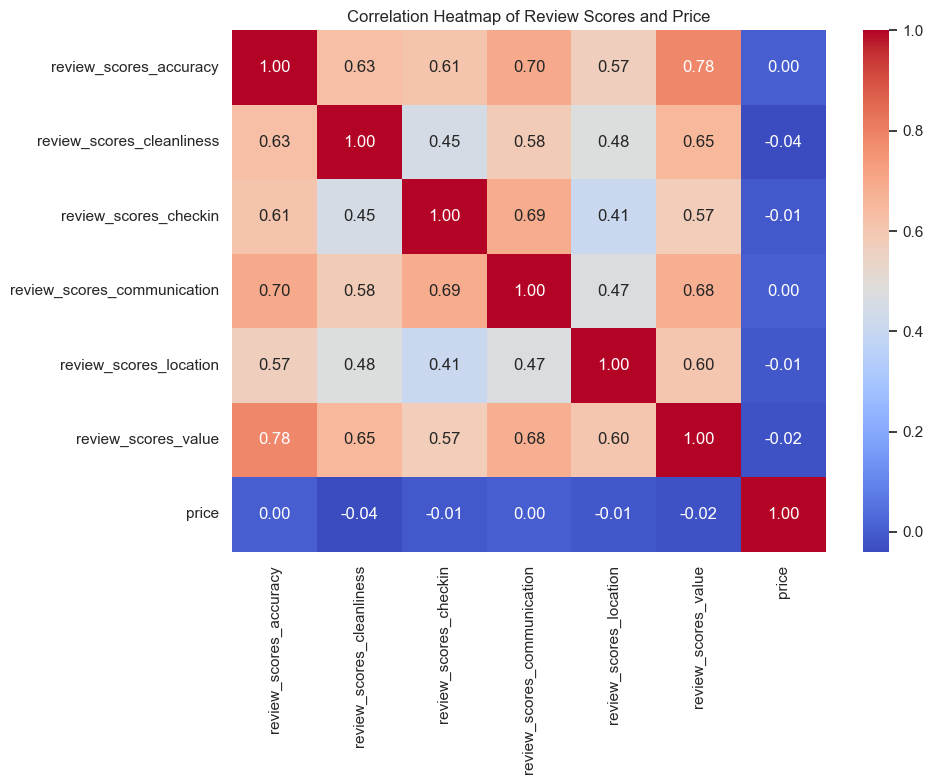

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the heatmap
heatmap_data = listings_detailed[review_scores_columns + ['price']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


## How many listings for each host

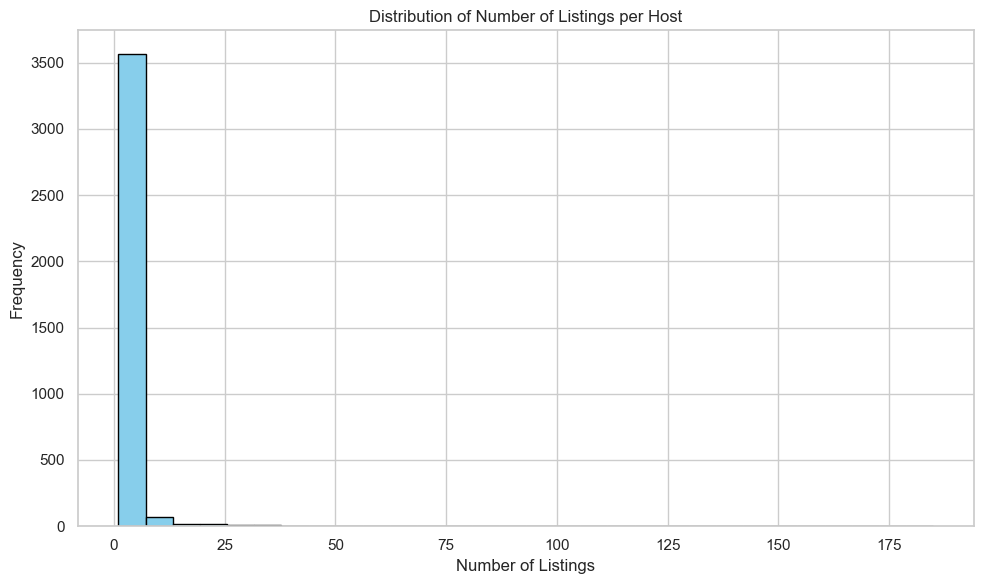

In [89]:
import matplotlib.pyplot as plt

# Group data by host_id and count the number of listings for each host
host_listings_count = listings_detailed.groupby('host_id')['id'].count()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(host_listings_count, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Listings per Host')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


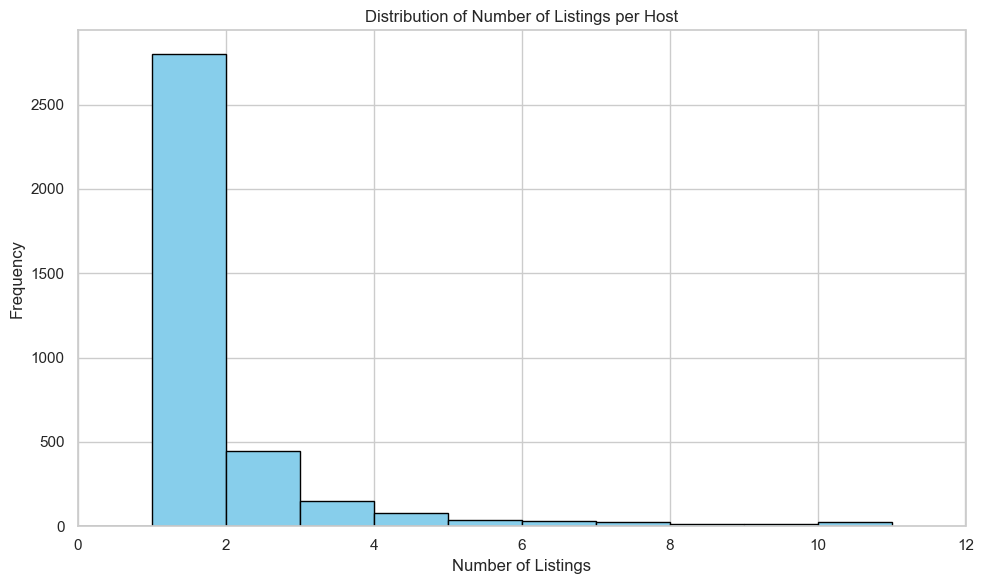

In [100]:
import matplotlib.pyplot as plt

# Group data by host_id and count the number of listings for each host
host_listings_count = listings_detailed.groupby('host_id')['id'].count()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(host_listings_count, bins=range(0,12), color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Listings per Host')
plt.xlabel('Number of Listings')
plt.xlim(0, 12)  
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


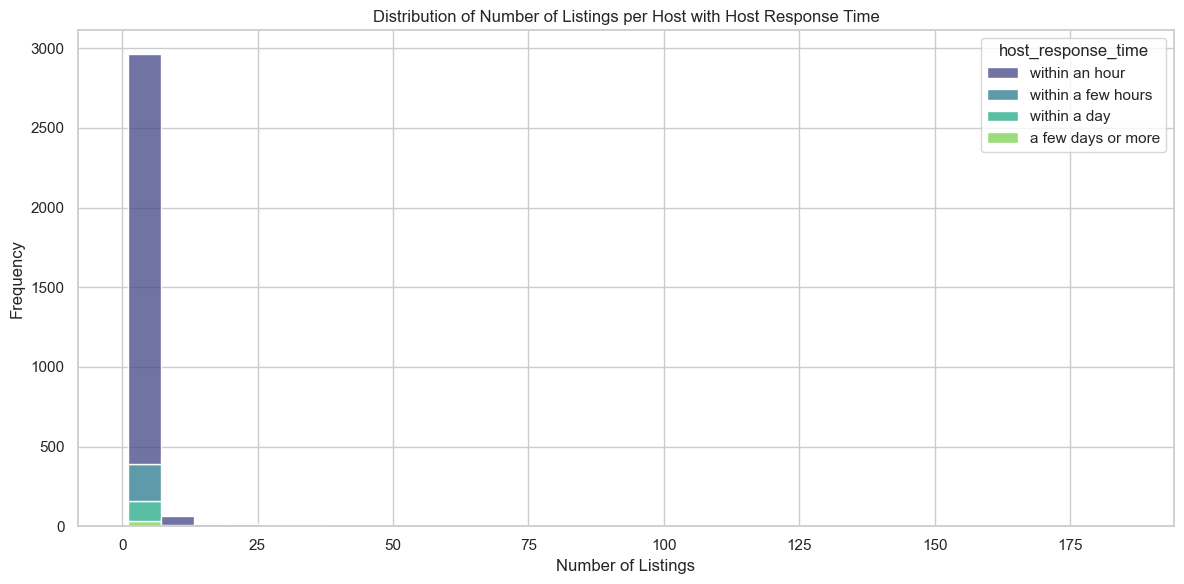

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by host_id and count the number of listings for each host
host_listings_count = listings_detailed.groupby('host_id')['id'].count().reset_index()

# Merge with the host_response_time information
host_response_time = listings_detailed[['host_id', 'host_response_time']].drop_duplicates()

# Merge the data
host_data = host_listings_count.merge(host_response_time, on='host_id', how='left')

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data, x='id', hue='host_response_time', bins=30, multiple='stack', palette='viridis')
plt.title('Distribution of Number of Listings per Host with Host Response Time')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

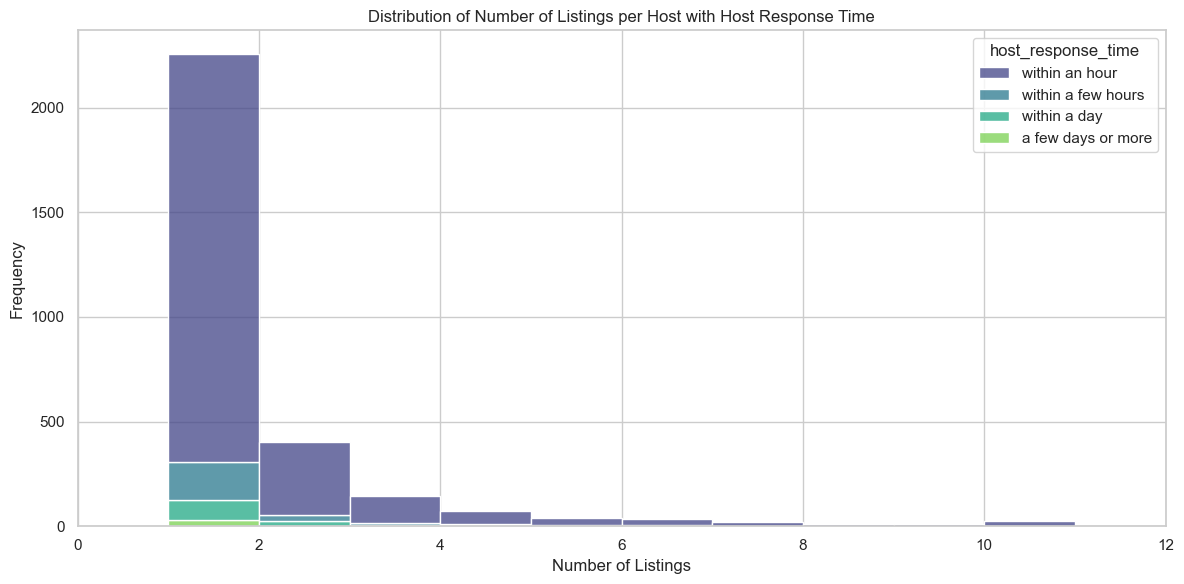

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by host_id and count the number of listings for each host
host_listings_count = listings_detailed.groupby('host_id')['id'].count().reset_index()

# Merge with the host_response_time information
host_response_time = listings_detailed[['host_id', 'host_response_time']].drop_duplicates()

# Merge the data
host_data = host_listings_count.merge(host_response_time, on='host_id', how='left')

# Plotting
bins = range(0, 12)
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data, x='id', hue='host_response_time', bins=bins, multiple='stack', palette='viridis')
plt.title('Distribution of Number of Listings per Host with Host Response Time')
plt.xlabel('Number of Listings')
plt.xlim(0, 12)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


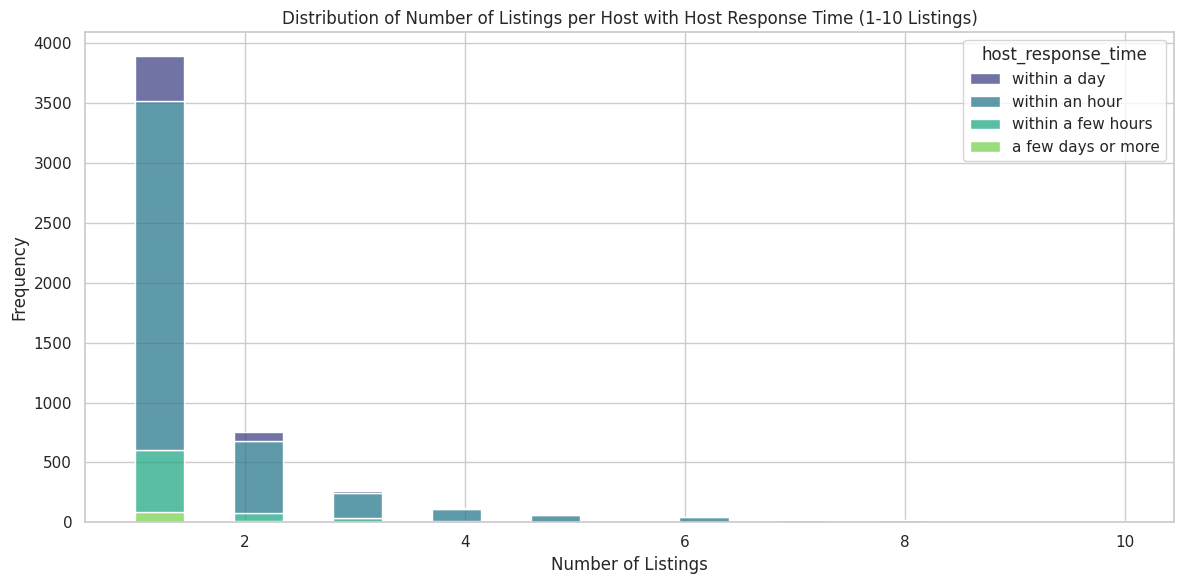

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter host_data to include only hosts with 1 to 20 listings
host_data_filtered = host_data[(host_data['id'] >= 1) & (host_data['id'] <= 10)]

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data_filtered, x='id', hue='host_response_time', bins=20, multiple='stack', palette='viridis')
plt.title('Distribution of Number of Listings per Host with Host Response Time (1-10 Listings)')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


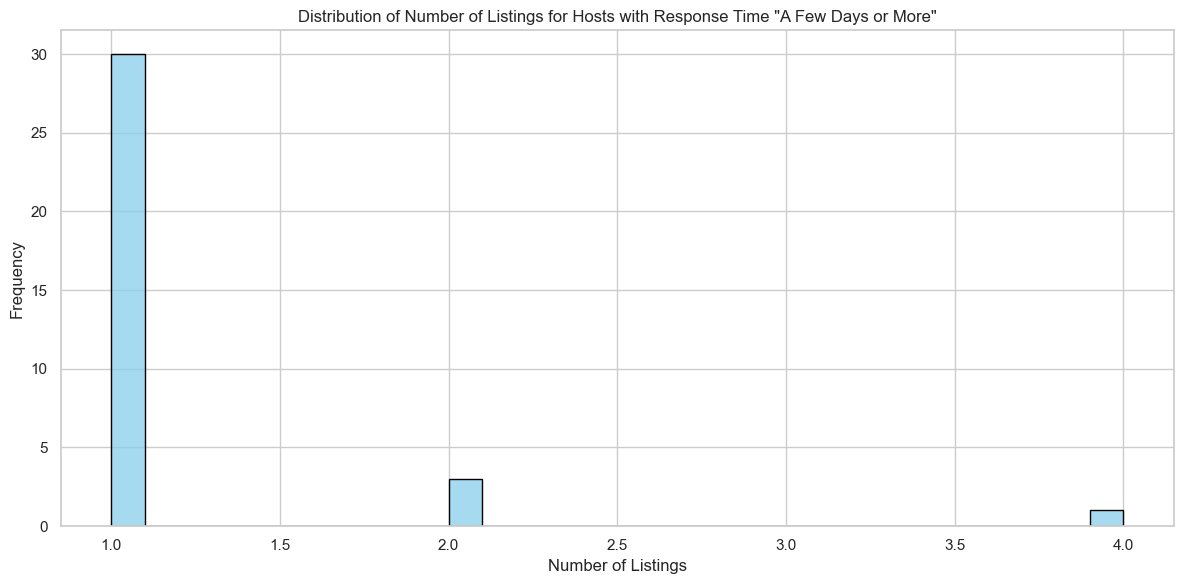

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter host_data for hosts with response time 'a few days or more'
host_data_filtered = host_data[host_data['host_response_time'] == 'a few days or more']

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data_filtered, x='id', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Listings for Hosts with Response Time "A Few Days or More"')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
host_listings_count

,host_id,id
0,1147,1
1,6383,1
2,12172,1
3,12291,1
4,22296,8
...,...,...
3697,504368565,1
3698,504624225,1
3699,504692736,1
3700,504961170,1


In [112]:
max(host_listings_count['id'])

185

## Host with 185 Property

In [115]:
# Filter the host_listings_count Series for the count of 162
host_id_with_the_most_count = host_listings_count[host_listings_count['id'] == 185]

# Display the host_id
print(host_id_with_the_most_count)


        host_id   id
1930  101426897  185


In [116]:
many_listings_host = listings_detailed[listings_detailed['host_id'] == 101426897]
many_listings_host

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,num_amenities
736,16090800,https://www.airbnb.com/rooms/16090800,20230319180930,2023-03-20,city scrape,Spacious Nashville Home-4BR- 2.5BTH-7 Beds,NO LOCAL BOOKINGS - Inquire Only - We Reserve ...,This neighborhood is located a very short dist...,https://a0.muscache.com/pictures/f54e211a-556b...,101426897,...,4.730,4.780,NaN,f,185,185,0,0,2.430,30
844,15706984,https://www.airbnb.com/rooms/15706984,20230319180930,2023-03-19,city scrape,Huge Vandy Home-Walk 2 Grocery-Mins To D'Town,NO LOCAL BOOKINGS - Inquire Only - We Reserve ...,This neighborhood is located just walking dist...,https://a0.muscache.com/pictures/miso/Hosting-...,101426897,...,4.880,4.820,NaN,f,185,185,0,0,1.950,29
911,17856206,https://www.airbnb.com/rooms/17856206,20230319180930,2023-03-19,city scrape,Hilltop Charmer-Super Close To Downtown-3Br,This beautiful single family home is spacious ...,Down the road from Topgolf and near the views ...,https://a0.muscache.com/pictures/de8b1634-778f...,101426897,...,4.390,4.710,NaN,f,185,185,0,0,2.770,33
938,17038951,https://www.airbnb.com/rooms/17038951,20230319180930,2023-03-19,city scrape,THE NATION NATIVE ★ Stunning 4BR ★ Private Yard,Super Quick Uber/Lyft to Downtown <br />Surrou...,This neighborhood is located just a short dist...,https://a0.muscache.com/pictures/5519acfc-646d...,101426897,...,4.790,4.760,NaN,f,185,185,0,0,1.970,32
940,17101446,https://www.airbnb.com/rooms/17101446,20230319180930,2023-03-20,city scrape,Luxury Downtown-Super Pad-Grand Skyline Views,"Modern construction with 2,223 square feet of ...",The Neighborhood is located next to The Gulch....,https://a0.muscache.com/pictures/miso/Hosting-...,101426897,...,4.850,4.740,NaN,f,185,185,0,0,3.000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7932,805783973310997800,https://www.airbnb.com/rooms/805783973310997800,20230319180930,2023-03-19,city scrape,The West End Wonder,Take in everything West End has to offer by st...,"Located in West End, this home is in a popular...",https://a0.muscache.com/pictures/miso/Hosting-...,101426897,...,5.000,5.000,NaN,f,185,185,0,0,2.000,20
8089,815946226214986026,https://www.airbnb.com/rooms/815946226214986026,20230319180930,2023-03-19,city scrape,West End Luxury - 30 Day Rental,Discover the ultimate in comfort and style in ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,101426897,...,NaN,NaN,NaN,f,185,185,0,0,NaN,22
8112,811645935641520737,https://www.airbnb.com/rooms/811645935641520737,20230319180930,2023-03-20,city scrape,Modern Townhome with Gorgeous Patio Space,If your dream Nashville vacation rental is a s...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,101426897,...,4.330,4.670,NaN,f,185,185,0,0,2.430,24
8174,812493637165196575,https://www.airbnb.com/rooms/812493637165196575,20230319180930,2023-03-20,city scrape,East Nashville Luxury - 30 Day Minimum,Experience the charm of East Nashville in this...,The home is located in a prime area close to m...,https://a0.muscache.com/pictures/miso/Hosting-...,101426897,...,NaN,NaN,NaN,f,185,185,0,0,NaN,25


In [117]:
# 1. Summary Statistics
price_stats = many_listings_host['price'].describe()

price_stats

count    185.000
mean     504.773
std     1429.734
min       90.000
25%      194.000
50%      256.000
75%      309.000
max     9999.000
Name: price, dtype: float64

In [118]:
num_room_stats = many_listings_host['bedrooms'].describe()
num_room_stats

count   184.000
mean      3.750
std       1.368
min       1.000
25%       3.000
50%       4.000
75%       4.000
max       8.000
Name: bedrooms, dtype: float64

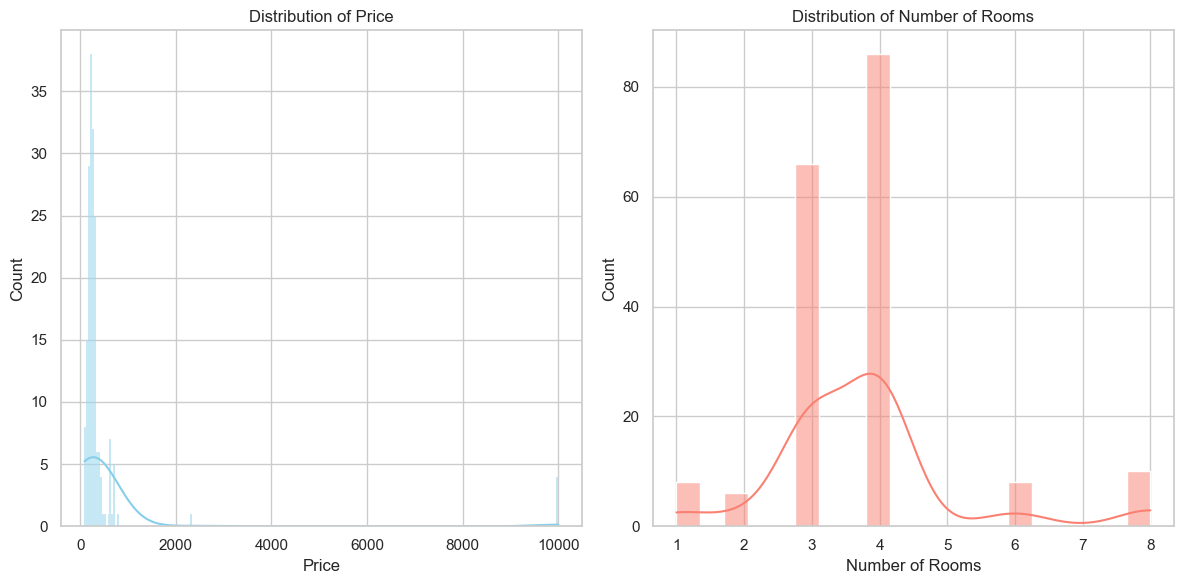

In [119]:
# 2. Distribution Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(many_listings_host['price'], kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.histplot(many_listings_host['bedrooms'], kde=True, color='salmon')
plt.title('Distribution of Number of Rooms')
plt.xlabel('Number of Rooms')

plt.tight_layout()
plt.show()

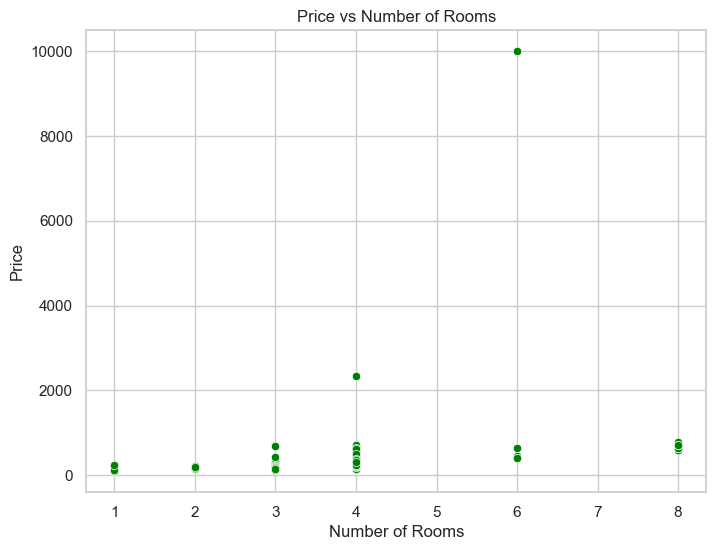

In [120]:
# 3. Relationship Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=many_listings_host, color='green')
plt.title('Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

In [121]:
many_listings_host.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [122]:
many_listings_host['neighbourhood_cleansed']

736      District 7
844     District 18
911      District 2
938     District 20
940     District 19
           ...     
7932    District 21
8089    District 24
8112    District 21
8174     District 7
8483    District 20
Name: neighbourhood_cleansed, Length: 185, dtype: object

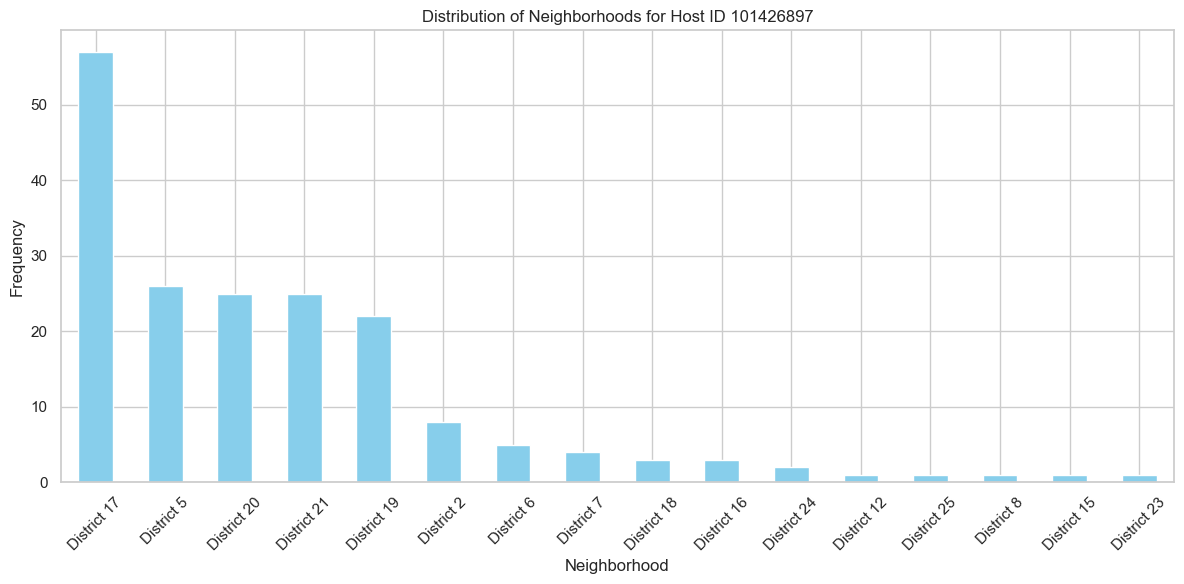

In [124]:
import matplotlib.pyplot as plt

# Count the occurrences of each neighborhood
neighborhood_counts = many_listings_host['neighbourhood_cleansed'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Neighborhoods for Host ID 101426897')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


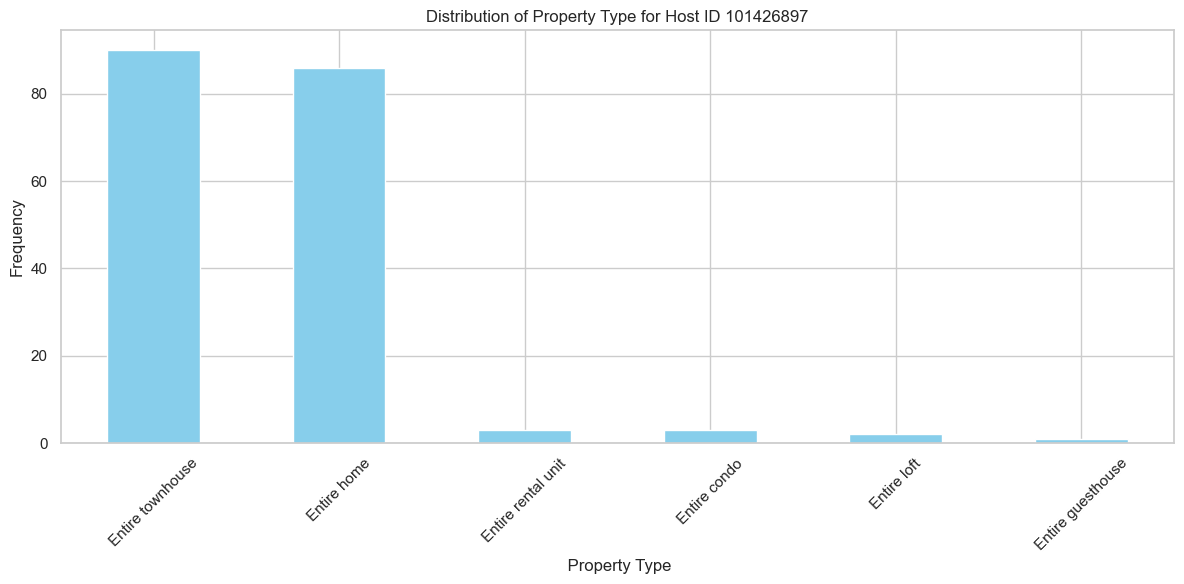

In [125]:
import matplotlib.pyplot as plt

# Count the occurrences of each property_type
property_type_counts = many_listings_host['property_type'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
property_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Type for Host ID 101426897')
plt.xlabel(' Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


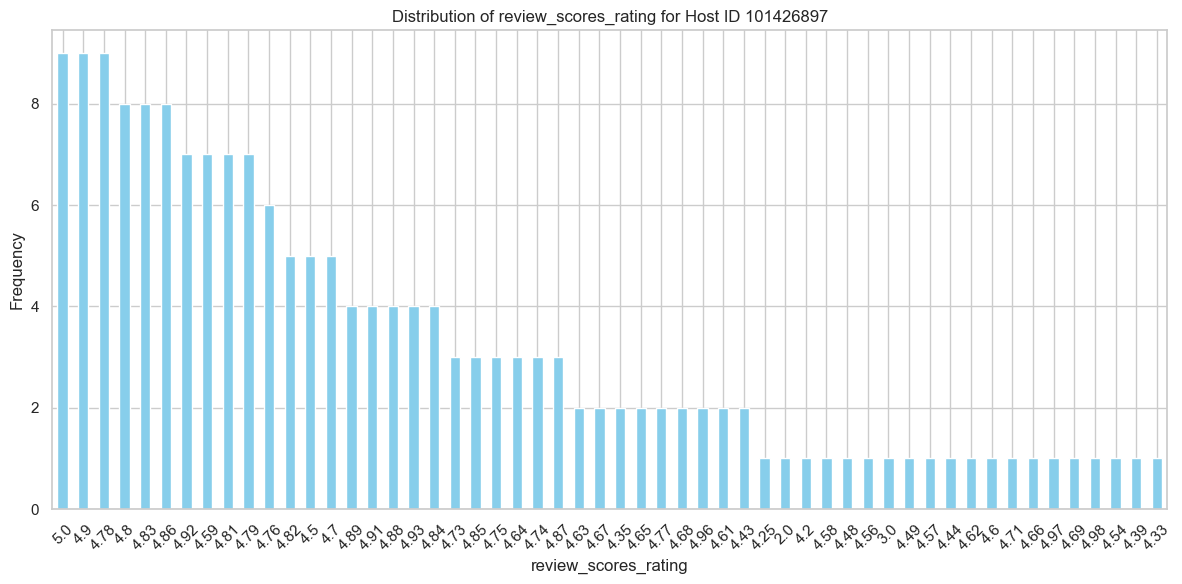

In [126]:
import matplotlib.pyplot as plt

# Count the occurrences of each review_scores_rating
review_scores_rating_counts = many_listings_host['review_scores_rating'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
review_scores_rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of review_scores_rating for Host ID 101426897')
plt.xlabel('review_scores_rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Neighbourhood

In [153]:
# neighbor = pd.read_csv('neighbourhoods.csv')
# neighbor_json = pd.read_json('neighbourhoods.geojson')

In [127]:
neighbor

,neighbourhood_group,neighbourhood
0,NaN,District 1
1,NaN,District 10
2,NaN,District 11
3,NaN,District 12
4,NaN,District 13
5,NaN,District 14
6,NaN,District 15
7,NaN,District 16
8,NaN,District 17
9,NaN,District 18


In [128]:
simple_eda(neighbor)

Basic Structure:
Number of Rows: 35
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    35
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 35


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['District 1' 'District 10' 'District 11' 'District 12' 'District 13'
 'District 14' 'District 15' 'District 16' 'District 17' 'District 18'
 'District 19' 'District 2' 'District 20' 'District 21' 'District 22'
 'District 23' 'District 24' 'District 25' 'District 26' 'District 27'
 'District 28' 'District 29' 'District 3' 'District 30'

In [129]:
neighbor_json

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
5,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
6,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
7,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
8,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
9,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [130]:
# Selecting one item
selected_item = neighbor_json['features'][0]  # Selecting the first item
print(selected_item)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-86.907382, 36.390515], [-86.907246, 36.390476], [-86.907121, 36.390459], [-86.907093, 36.390457], [-86.907091, 36.390457], [-86.907023, 36.390451], [-86.906785, 36.390359], [-86.90655, 36.390266], [-86.906539, 36.39026], [-86.906337, 36.390164], [-86.906089, 36.390052], [-86.905898, 36.389974], [-86.905734, 36.389936], [-86.905606, 36.38991], [-86.905518, 36.389889], [-86.905502, 36.389885], [-86.905497, 36.389881], [-86.905401, 36.389815], [-86.905316, 36.389748], [-86.905288, 36.389727], [-86.905217, 36.389676], [-86.905111, 36.389622], [-86.90492, 36.38957], [-86.904849, 36.389551], [-86.904773, 36.38953], [-86.90459, 36.389448], [-86.904445, 36.389385], [-86.904346, 36.389335], [-86.904218, 36.389281], [-86.904201, 36.38928], [-86.904194, 36.38928], [-86.90406, 36.389274], [-86.903968, 36.389323], [-86.903898, 36.38933], [-86.903828, 36.389348], [-86.903811, 36.389352], [-86.903697, 36.389333], [-86.903637

# Reviews

In [131]:
review

,listing_id,date
0,6422,2009-04-30
1,6422,2009-06-11
2,6422,2009-06-17
3,6422,2009-07-18
4,6422,2009-09-29
...,...,...
541571,834847469298363796,2023-03-05
541572,834847469298363796,2023-03-12
541573,834847469298363796,2023-03-13
541574,834847469298363796,2023-03-15


In [132]:
simple_eda(review)

Basic Structure:
Number of Rows: 541576
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 7360
date: 4007


Summary Statistics for Numerical Columns:
                  listing_id
count             541576.000
mean   43977611295623496.000
std   162637608791751552.000
min                 6422.000
25%             14054945.000
50%             25832972.000
75%             43059987.000
max   845011400506472960.000 

Categorical Columns Details:
Column 'date' unique values:
['2009-04-30' '2009-06-11' '2009-06-17' ... '2020-03-27' '2023-03-27'
 '2020-04-13']


# Review Detailed

In [133]:
review_detailed

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...
...,...,...,...,...,...,...
541571,834847469298363796,840688808680615547,2023-03-05,252692312,Temeria,Nice
541572,834847469298363796,845662127129833426,2023-03-12,7628331,Nick,Was in town for business and this place was a ...
541573,834847469298363796,846369101780918793,2023-03-13,451792152,Kelvin,Comfy and really neat. Close to the highway if...
541574,834847469298363796,847846659778517976,2023-03-15,380086996,Weiyi,This place was a very great stay for our group...


In [134]:
simple_eda(review_detailed)

Basic Structure:
Number of Rows: 541576
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         188
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 7360
id: 541576
date: 4007
reviewer_id: 494146
reviewer_name: 39073
comments: 519804


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             541576.000             541576.000    541576.000
mean   43977611295623488.000 303940843221634304.000 175514251.091
std   162637608791752448.000 326995524095252160.000 136340340.463
min                 6422.000               1927.000         2.000
25%             14054945.000          439310329.000  59379975.000
50%             25832972.000         